In [1]:
import pandas as pd                                     # type: ignore
import numpy as np                                      # type: ignore     
import matplotlib.pyplot as plt                         # type: ignore            
import seaborn as sns                                   # type: ignore    
from matplotlib.colors import LinearSegmentedColormap   # type: ignore

In [2]:
PWF16_concatenados = pd.read_csv('data/PTOPER_202210_PWF16_OPFCMW.csv')
#PWF16_Filt = PWF16_concatenados[(PWF16_concatenados['Type'] == ' TL')]

In [3]:
PWF16_Filt = PWF16_concatenados
PWF16_Filt

From#      From Name   To#        To Name     Type    MVA   % L1   
0            27   CPAUL2-SP500    87   RESEND-RJ500       TL  597.8  32.23  \
1            27   CPAUL2-SP500  1503   ITAJU3-MG500       TL  226.2  12.19   
2            27   CPAUL2-SP500  3010   ESTREI-MG500       TL  608.9  24.93   
3            27   CPAUL2-SP500  3383   LORENA-SP500       TL  244.0   8.95   
4            52   P.ACU--RJ345   147   CAMPOS-RJ345       TL   27.5   2.16   
...         ...            ...   ...            ...      ...    ...    ...   
18287567  43673   RVRB2BCAP500  4595   RV-RB2CAP500   SERCAP  311.9  12.42   
18287568  43797   VI-JAACAP230  6898   VI-JA1CAP230   SERCAP   95.8  27.93   
18287569  43798   VI-JABCAP230  6899   VI-JA2CAP230   SERCAP   95.8  27.93   
18287570  43956   IZ-PD2-MA500  6515   IZ-PD2CAP500   SERCAP  753.6  37.83   
18287571  43957   PD-IZ2-MA500  6514   PD-IZ2CAP500   SERCAP  844.7  42.40   

          L1(MVA)  MW:From-To  Mvar:From-To Power Factor:From-To  Mvar:Losses   
0          1855.0       535.1         266.5            0.895 Cap         97.6  \
1          1855.0      -192.8        -118.3                    -        -67.8   
2          2442.0      -572.5        -207.3                    -       -156.2   
3          2728.0       172.7         141.4            0.774 Cap        -31.0   
4          1275.0         0.0           0.0                    -        -27.5   
...           ...         ...           ...                  ...          ...   
18287567   2511.0      -224.5        -216.6                    -        -12.3   
18287568    343.0       -87.6         -38.8                    -         -8.2   
18287569    343.0       -87.6         -38.8                    -         -8.2   
18287570   1992.0      -738.2        -151.6                    -        -59.2   
18287571   1992.0       751.6        -385.4            0.890 Ind        -74.8   

          Dia   Hora  Circ#  
0           2  00-00      1  
1           2  00-00      1  
2           2  00-00      2  
3           2  00-00      1  
4           2  00-00      1  
...       ...    ...    ...  
18287567   29  23-30      2  
18287568   29  23-30      1  
18287569   29  23-30      2  
18287570   29  23-30      2  
18287571   29  23-30      2  

[18287572 rows x 15 columns]

<b><h1 style="color:#FF851B;">Interligações</h1></b>

In [6]:
linhas_expNE = pd.read_csv('E:/FERV/marck/LINHAS/buses_EXPNE.csv',sep=';', skipinitialspace=True)
linhas_expNE_flip = pd.read_csv('E:/FERV/marck/LINHAS/buses_EXPNE_flip.csv',sep=';', skipinitialspace=True)

linhas_FNS = pd.read_csv('E:/FERV/marck/LINHAS/buses_FNS.csv',sep=';', skipinitialspace=True)

linhas_FNESE = pd.read_csv('E:/FERV/marck/LINHAS/buses_FNESE.csv',sep=';', skipinitialspace=True)             
linhas_FNESE_flip = pd.read_csv('E:/FERV/marck/LINHAS/buses_FNESE_flip.csv',sep=';', skipinitialspace=True)  

linhas_FNEN_flip = pd.read_csv('E:/FERV/marck/LINHAS/buses_FNEN_flip.csv',sep=';', skipinitialspace=True)    
linhas_FNEN = pd.read_csv('E:/FERV/marck/LINHAS/buses_FNEN.csv',sep=';', skipinitialspace=True)              

linhas_FSULSECO_flip = pd.read_csv('E:/FERV/marck/LINHAS/buses_FSULSECO_flip.csv',sep=';', skipinitialspace=True)
linhas_FSULSECO = pd.read_csv('E:/FERV/marck/LINHAS/buses_FSULSECO.csv',sep=';', skipinitialspace=True) 

In [8]:
def dataset_grouped(pw_concatenados, linhas, linhas_flip, opt=None):
    if opt == None:
        data_grouped = pw_concatenados[pw_concatenados
                                       .set_index(['From#', 'To#'])
                                       .index.isin(linhas.set_index(['De', 'Para']).index)]
    else:
        data_grouped = pw_concatenados[pw_concatenados
                                       .set_index(['From#', 'To#'])
                                       .index.isin(linhas.set_index(['De', 'Para']).index)]
        linhas_para_inverter = data_grouped[data_grouped
                                            .set_index(['From#', 'To#'])
                                            .index.isin(linhas_flip.set_index(['De', 'Para']).index)]
        data_grouped.loc[linhas_para_inverter.index, 'MW:From-To'] *= -1
        
    return data_grouped

In [9]:
def min_max_plot(dataset, col=None, frm=None, to=None):
    plt.style.use('seaborn-v0_8-colorblind')

    # plotting MW
    plt.figure(figsize=(14, 7))

    day_list = sorted(list(set(dataset['Dia'])))
    mx = int(dataset[dataset[col] == dataset[col].max()]['Dia'].item()) - 1
    mn = int(dataset[dataset[col] == dataset[col].min()]['Dia'].item()) - 1
    day_list_mxmn = [day_list[mx], day_list[mn]]

    # start dates
    x = dataset[dataset['Dia'] == '02']['Hora']
    y = dataset[dataset['Dia'] == '02'][col]


    for day in day_list_mxmn:
        x = dataset[dataset['Dia'] == day]['Hora']
        y = dataset[dataset['Dia'] == day][col]
        
        # get max value
        max_y     = np.max(np.array(y))
        max_index = np.argmax(np.array(y))
        
        max_x = x.iloc[max_index]
        max_y = y.iloc[max_index]
        
        # get min value
        min_y     = np.min(np.array(y))
        min_index = np.argmin(np.array(y))
        
        min_x = x.iloc[min_index]
        min_y = y.iloc[min_index]
        
        plt.plot(x, y, label=f'Dia {day}')
        
        if col == 'MW:From-To':
            plt.scatter(max_x, max_y, color='k', s=100, label=f'Max. Value ({max_x} h, {round(max_y,2)} MW)')
            plt.scatter(min_x, min_y, color='r', s=100, label=f'Min. Value ({min_x} h, {round(min_y,2)} MW)')
        else:
            plt.scatter(max_x, max_y, color='k', s=100, label=f'Max. Value ({max_x} h, {round(max_y,2)} MVAr)')
            plt.scatter(min_x, min_y, color='r', s=100, label=f'Min. Value ({min_x} h, {round(min_y,2)} MVAr)')
    
    if col == 'MW:From-To':
        val_max = dataset['MW:From-To'].max()
        val_min = round(dataset['MW:From-To'].min(), 2)
    else:
        val_max = dataset['Mvar:From-To'].max()
        val_min = round(dataset['Mvar:From-To'].min(), 2)

    plt.axhline(y=val_max, color='r', linestyle='--')
    plt.axhline(y=val_min, color='g', linestyle='--')
    #plt.axhline(y=0, color='k', linestyle='--')

    plt.text(5, val_max, f'Max. Value: {round(val_max,2)} MW', color='r', fontsize=12, ha='left', va='bottom')
    plt.text(5, val_min, f'Min Value: {round(val_min,2)} MW', color='g', fontsize=12, ha='left', va='top')

    n = 2
    plt.xlim(x.iloc[0], x.iloc[-1])
    plt.xticks(x[::n], x[::n], rotation=45)

    plt.xlabel('Hora', weight='bold')
    plt.ylabel(f'{col}', weight='bold')

    plt.grid(True)
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.title(fr'{frm}$\rightarrow${to}', 
              weight='bold', fontsize=22, x=0.5, y=1.03)

    plt.show()

In [7]:
def flow_heatmap(dataset, col=None, frm=None, to=None, center=None):
    n_days = len(sorted(list(set(dataset['Dia'])))) # 28 days (October)
    days = list(set(dataset['Dia']))
    half_hour_list = sorted(list(set(dataset['Hora'])))
    n_half_hour = len(half_hour_list)
    half_hour_periods = pd.date_range(start='2023-10-17', periods=n_half_hour, freq='30T').strftime('%H:%M')

    active_power = np.array(dataset[col]).reshape(n_days, -1)
    heatmap_data = pd.DataFrame(active_power[::-1], index=range(n_days, 0, -1), columns=half_hour_periods)    

    # save path
    #path ='E:/FERV/marck/202210_Melhor Previsao FNS/Plots/'
    #frmstr = frm.split(' ', 1)[0]
    #tostr  = to.split(' ', 1)[0]

    vmax = dataset[col].max()
    vmin = dataset[col].min()
    
    colors = [[0, 'blue'],
          [- vmin / (vmax - vmin), 'white'],
          [(1 - vmin)/ (vmax - vmin), 'white'],
          [1, 'red']]
       
    if vmin >= 0 or (vmin <= 0 and vmax <= 0):
      cmap = sns.diverging_palette(230, 10, as_cmap=False)
    else:
      cmap = LinearSegmentedColormap.from_list('', colors) 
       

    n = 2
    
    plt.figure(figsize=(12, 6))
    
    sns.heatmap(heatmap_data, cmap=cmap, center=center, 
                xticklabels=n, cbar_kws={'label': f'{col}'}, 
                linewidths=0.1, linecolor="white", mask=heatmap_data == 0.0)     

    plt.xticks(rotation=45)

    plt.xlabel('Half Hour Period', weight='bold')
    plt.ylabel('Day of the Month', weight='bold')
    plt.title(fr'{frm}$\rightarrow${to}', 
              weight='bold', fontsize=22, x=0.5, y=1.03)

    if col == 'MW:From-To':
      plt.annotate(fr'$Max. value:$ {round(vmax, 2)} MW',
                  xy=(10, 0.005))
      plt.annotate(fr'$Min. value:$ {round(vmin, 2)} MW',
                  xy=(25, 0.005))
      #plt.savefig(path + f'MW/{}/MW_HeatMap_{frmstr}_{tostr}.png')
      
    elif col == 'Mvar:From-To':
      plt.annotate(fr'$Max. value:$ {round(vmax, 2)} MVAr',
                  xy=(10, 0.005))
      plt.annotate(fr'$Min. value:$ {round(vmin, 2)} MVAr',
                  xy=(25, 0.005))

    plt.show()

In [10]:
def persistency_curve(dataset, col=None, frm=None, to=None, x_val=None, y_val=None, diff=None):
    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.sort(np.array(dataset[col]))
    N = len(x)

    y = np.linspace(1, N, N)
    
    N_cases = N

    cant_impt = len(dataset.loc[dataset[col] < 0])
    cant_expt = len(dataset.loc[dataset[col] > 0])
    impt = round((cant_impt / N_cases) * 100, 2)
    expt = round((cant_expt / N_cases) * 100, 2)
            
    ax.set_xlim(0, N+100)

    ax.set_xlabel('Number of hours', weight='bold') 
    ax.set_ylabel(f'{col}', weight='bold') 
    ax.set_title(fr'P. Curve {frm}$\rightarrow${to}', weight='bold', fontsize=22, x=0.5, y=1.03)
    
    ax.text(x_val, y_val, f'$Import:$ {impt} % ({cant_impt} cases)', fontsize=12, 
         bbox = dict(facecolor = 'blue', alpha = 0.3), weight='bold')
    
    ax.text(x_val, y_val-diff, f'$Export:$ {expt} % ({cant_expt} cases)', fontsize=12,
            bbox = dict(facecolor = 'blue', alpha = 0.3), weight='bold')
    
    ax.grid(False)
    
    plt.plot(y, x)
    plt.show()

In [11]:
def general_plot(dataset, col, frm=None, to=None):
    nrow = 7 # [0 - 6]
    ncol = 4 # [0 - 3]
    n = 3
    day = 1

    fig, axes = plt.subplots(nrow, ncol, figsize=(18, 15))
    for nr in range(nrow):
        for nc in range(ncol):
            x_rect = dataset[dataset['Dia'] == day]['Hora']
            y_rect = dataset[dataset['Dia'] == day][col]
            
            axes[nr][nc].plot(x_rect, y_rect, color='green')
            axes[nr][nc].set_xlim(x_rect.iloc[0], x_rect.iloc[-1])
            axes[nr][nc].set_xticks(x_rect[::n], x_rect[::n], rotation=45)
            axes[nr][nc].set_xlabel('Hora', weight='bold')
            axes[nr][nc].set_ylabel(f'{col}', weight='bold')
            axes[nr][nc].set_title('Dia ' + str(day), weight='bold')
            day += 1

    plt.suptitle(fr'{frm}$\rightarrow${to}', 
              weight='bold', fontsize=22, x=0.5, y=1)
    plt.tight_layout()
    plt.show()

<b><h1 style="color:#7FDBFF;">N-S interface (N Export)</h1></b>

In [12]:
EXPNS_grouped = dataset_grouped(PWF16_Filt, linhas_FNS, linhas_flip=None, opt=None)

In [13]:
EXPNS = EXPNS_grouped.groupby(['Dia', 'Hora']).agg({'MW:From-To': sum, 'Mvar:From-To': sum, '% L1': sum})
EXPNS = EXPNS.reset_index()
EXPNS['Hora'] = pd.to_datetime(EXPNS['Hora'], format='%H-%M').dt.strftime('%H:%M')
EXPNS

Dia   Hora  MW:From-To  Mvar:From-To   % L1
0       2  00:00      2214.6        -335.7  88.40
1       2  00:30      1997.7        -383.2  80.08
2       2  01:00      1307.4        -323.3  54.37
3       2  01:30       720.8        -337.7  35.50
4       2  02:00       795.5        -406.3  38.11
...   ...    ...         ...           ...    ...
1339   29  21:30       -13.1        -535.0  22.31
1340   29  22:00        47.9        -545.8  23.14
1341   29  22:30       216.3        -567.4  26.27
1342   29  23:00       428.9        -538.5  30.12
1343   29  23:30       568.8        -519.4  33.43

[1344 rows x 5 columns]

<b><h2 style="color:#FF851B;">MW</h2></b>

In [17]:
#general_plot(EXPNS, 'MW:From-To', 'N', 'S')

In [18]:
#min_max_plot(EXPNS, 'MW:From-To', 'N', 'S')

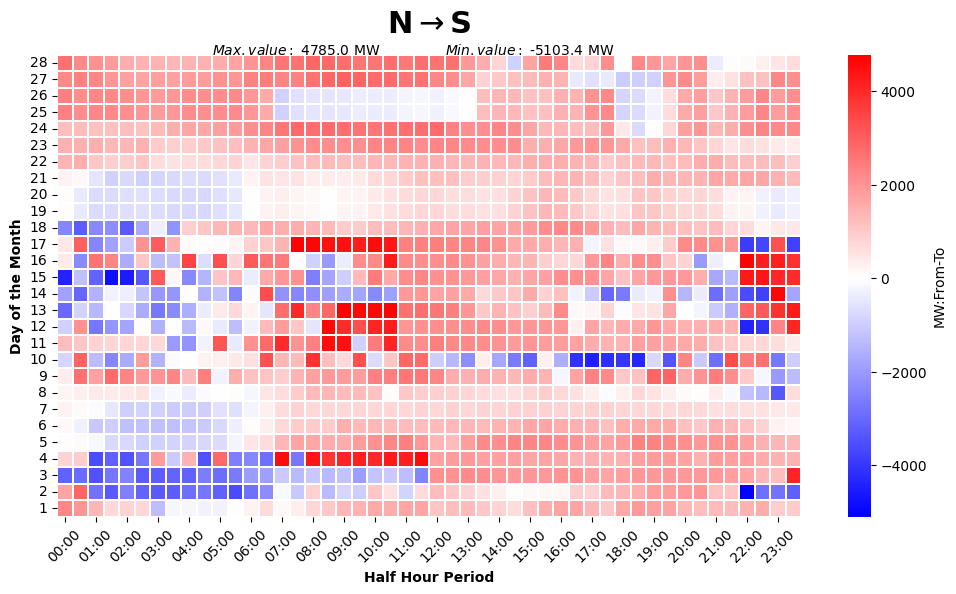

In [19]:
flow_heatmap(EXPNS, 'MW:From-To', 'N', 'S')

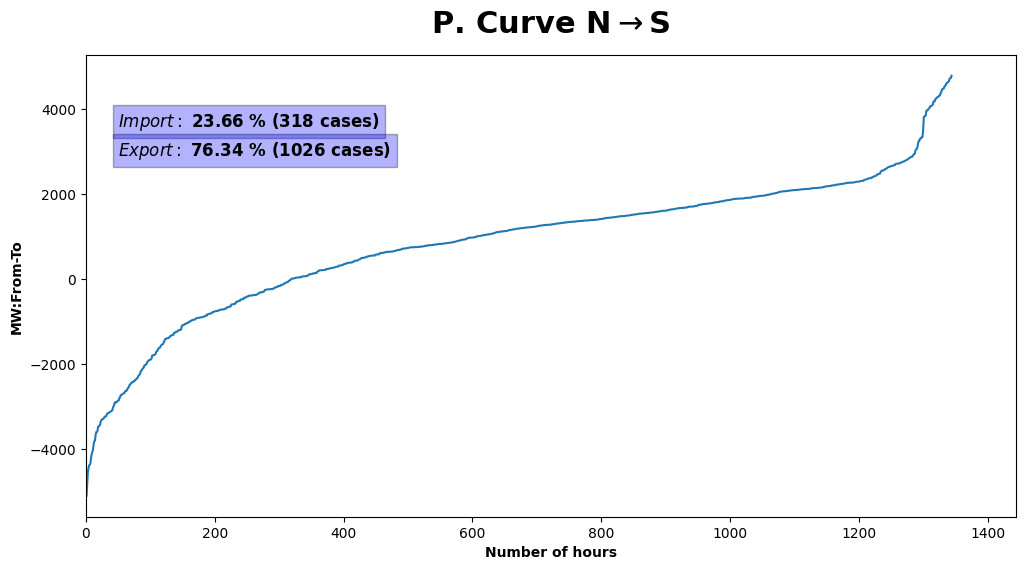

In [20]:
persistency_curve(EXPNS, 'MW:From-To', 'N', 'S', 50, 3580, 680)

<b><h2 style="color:#FF851B;">MVAr</h2></b>

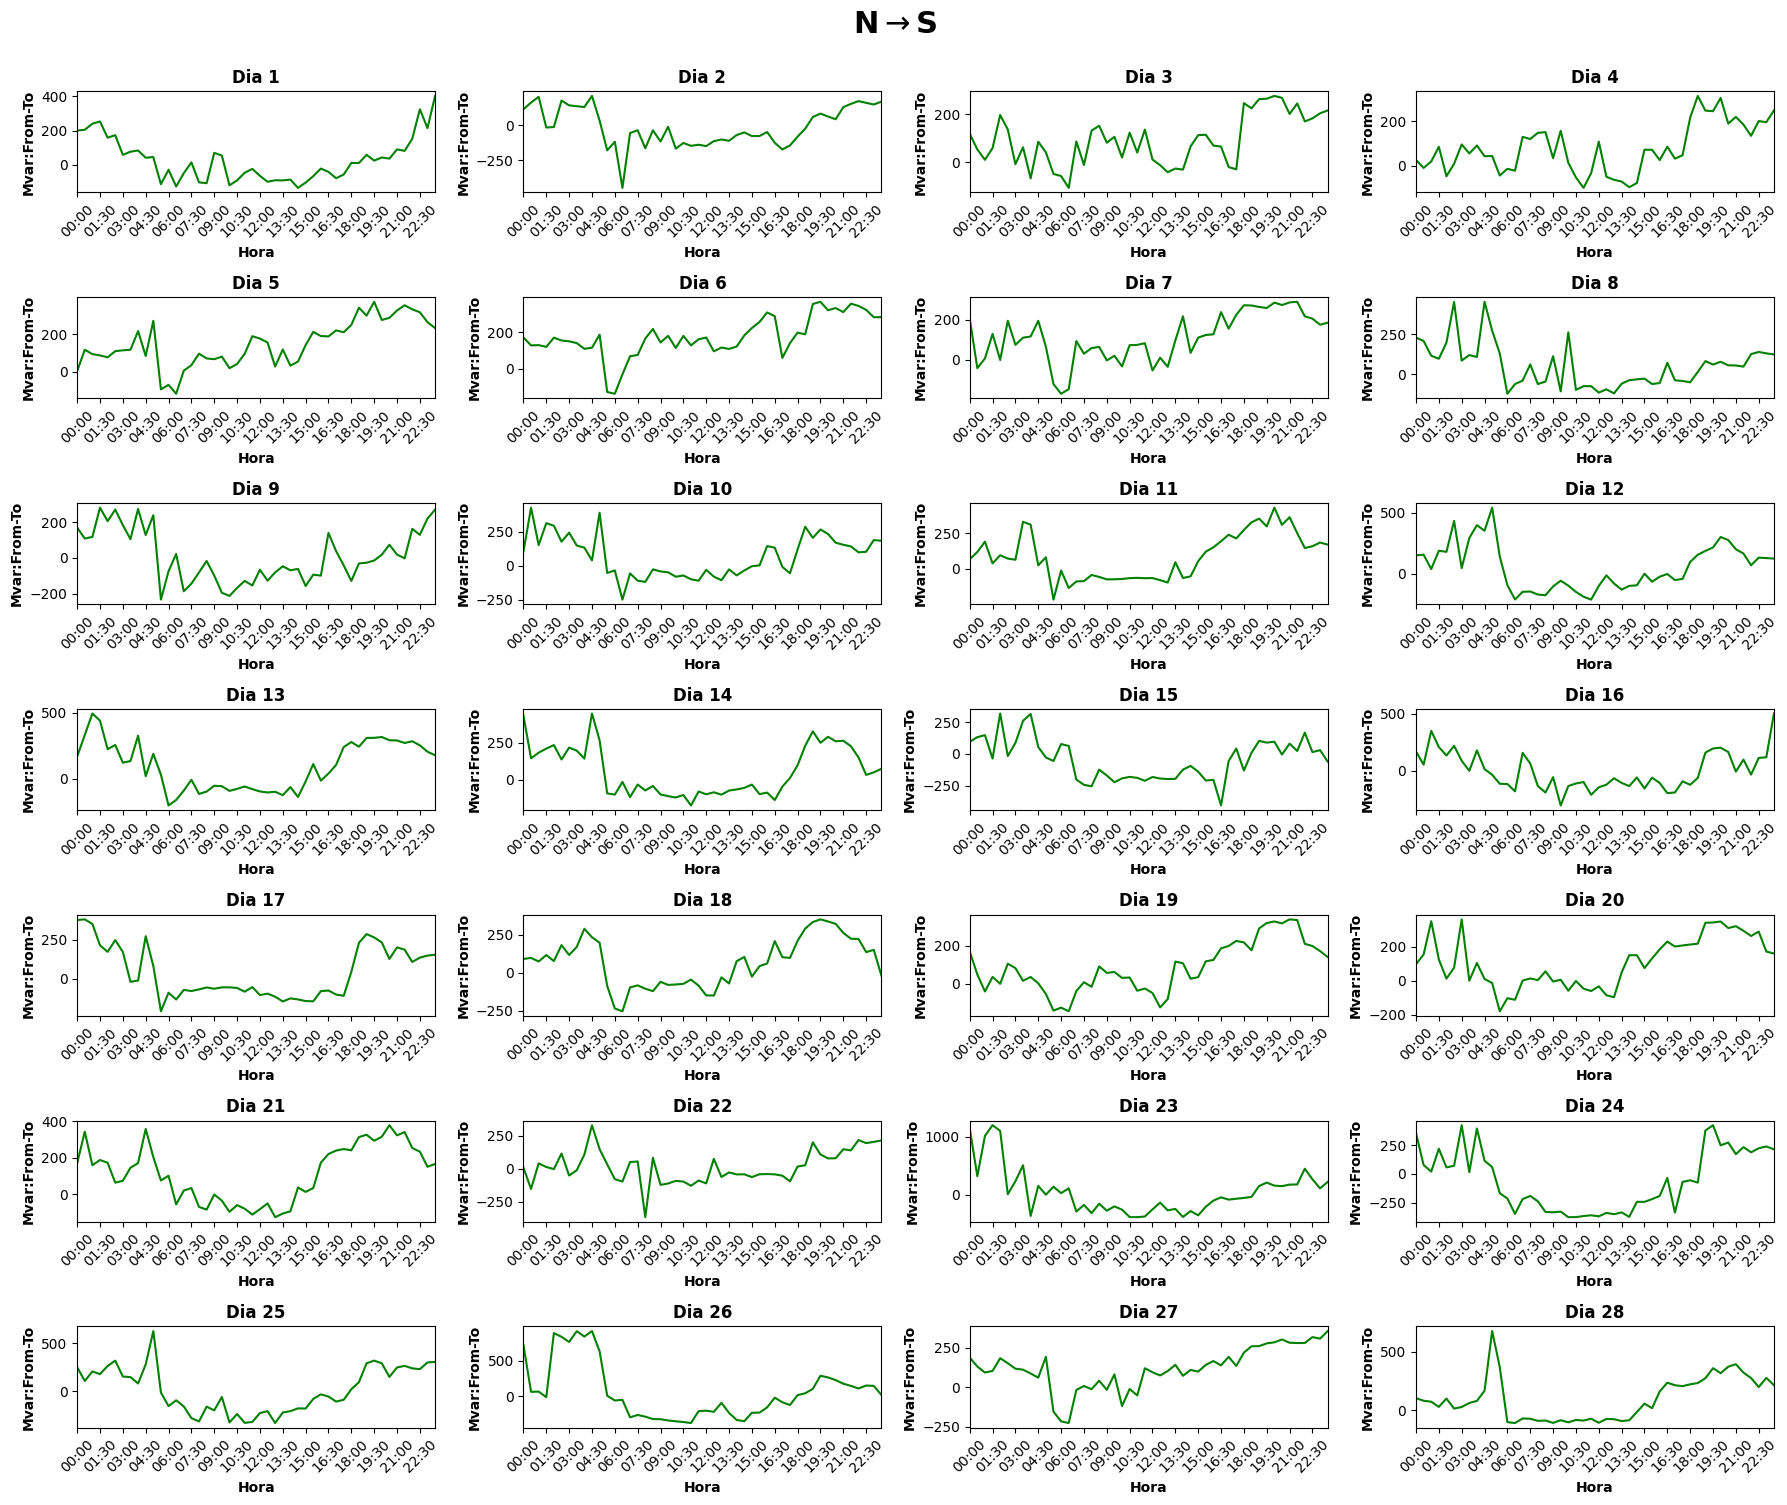

In [16]:
general_plot(EXPNS, 'Mvar:From-To', 'N', 'S')

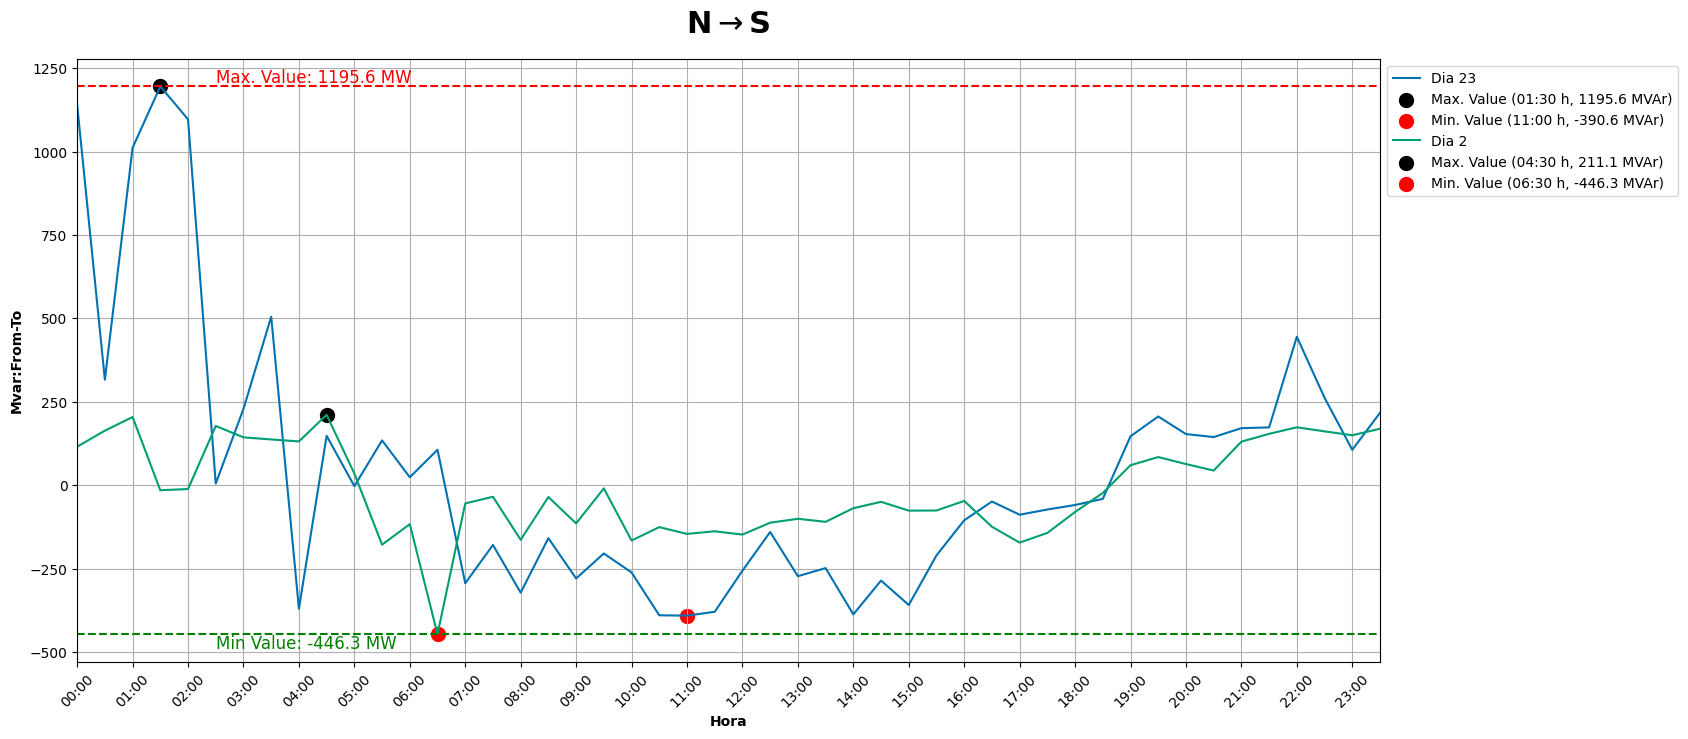

In [17]:
min_max_plot(EXPNS, 'Mvar:From-To', 'N', 'S')

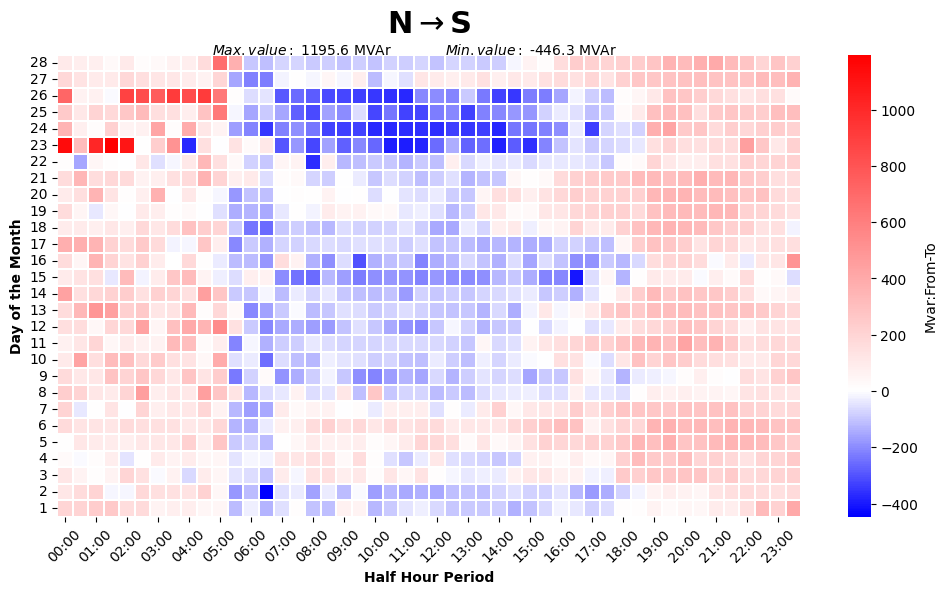

In [18]:
flow_heatmap(EXPNS, 'Mvar:From-To', 'N', 'S')

<b><h1 style="color:#7FDBFF;">NE interface (Northeast Export)</h1></b>

In [14]:
EXPNE_grouped = dataset_grouped(PWF16_Filt, linhas_expNE, linhas_expNE_flip, 1)

In [15]:
EXPNE = EXPNE_grouped.groupby(['Dia', 'Hora']).agg({'MW:From-To': sum, 'Mvar:From-To': sum, '% L1': sum})
EXPNE = EXPNE.reset_index()
EXPNE['Hora'] = pd.to_datetime(EXPNE['Hora'], format='%H-%M').dt.strftime('%H:%M')
EXPNE

Dia   Hora  MW:From-To  Mvar:From-To    % L1
0       2  00:00      6706.2        -897.0  321.10
1       2  00:30      6579.6        -847.8  323.32
2       2  01:00      6434.8       -1042.3  319.56
3       2  01:30      6294.9       -1114.9  316.00
4       2  02:00      6198.2       -1064.4  310.58
...   ...    ...         ...           ...     ...
1339   29  21:30      9485.5        -983.5  435.23
1340   29  22:00      9479.0        -972.2  436.09
1341   29  22:30      9183.1        -939.8  422.41
1342   29  23:00      9002.9       -1029.2  414.43
1343   29  23:30      8718.4       -1068.6  401.51

[1344 rows x 5 columns]

<b><h2 style="color:#FF851B;">MW</h2></b>

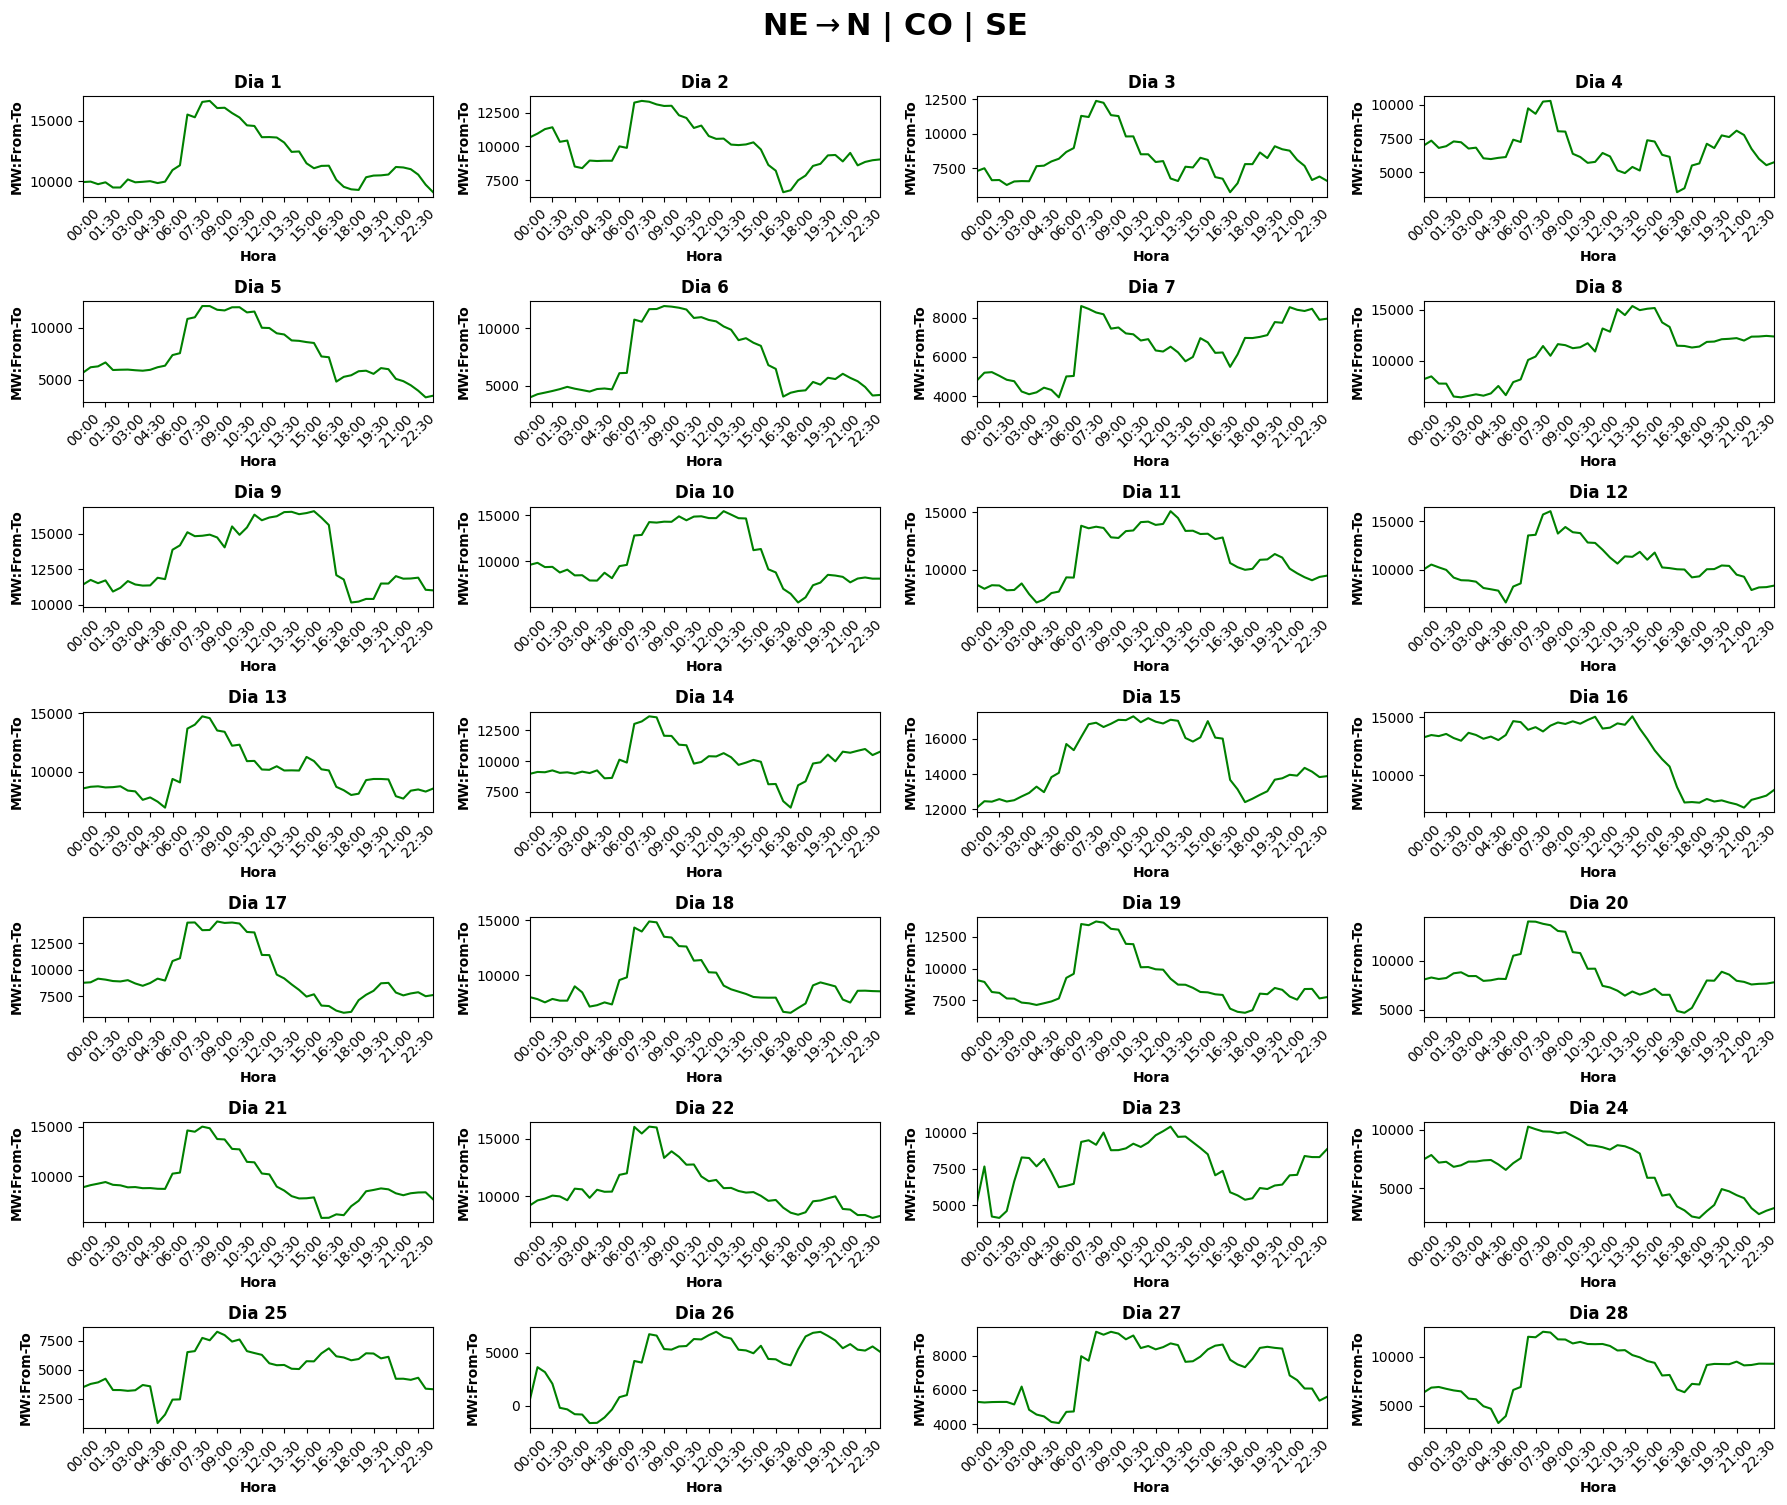

In [21]:
general_plot(EXPNE, 'MW:From-To', 'NE', 'N | CO | SE')

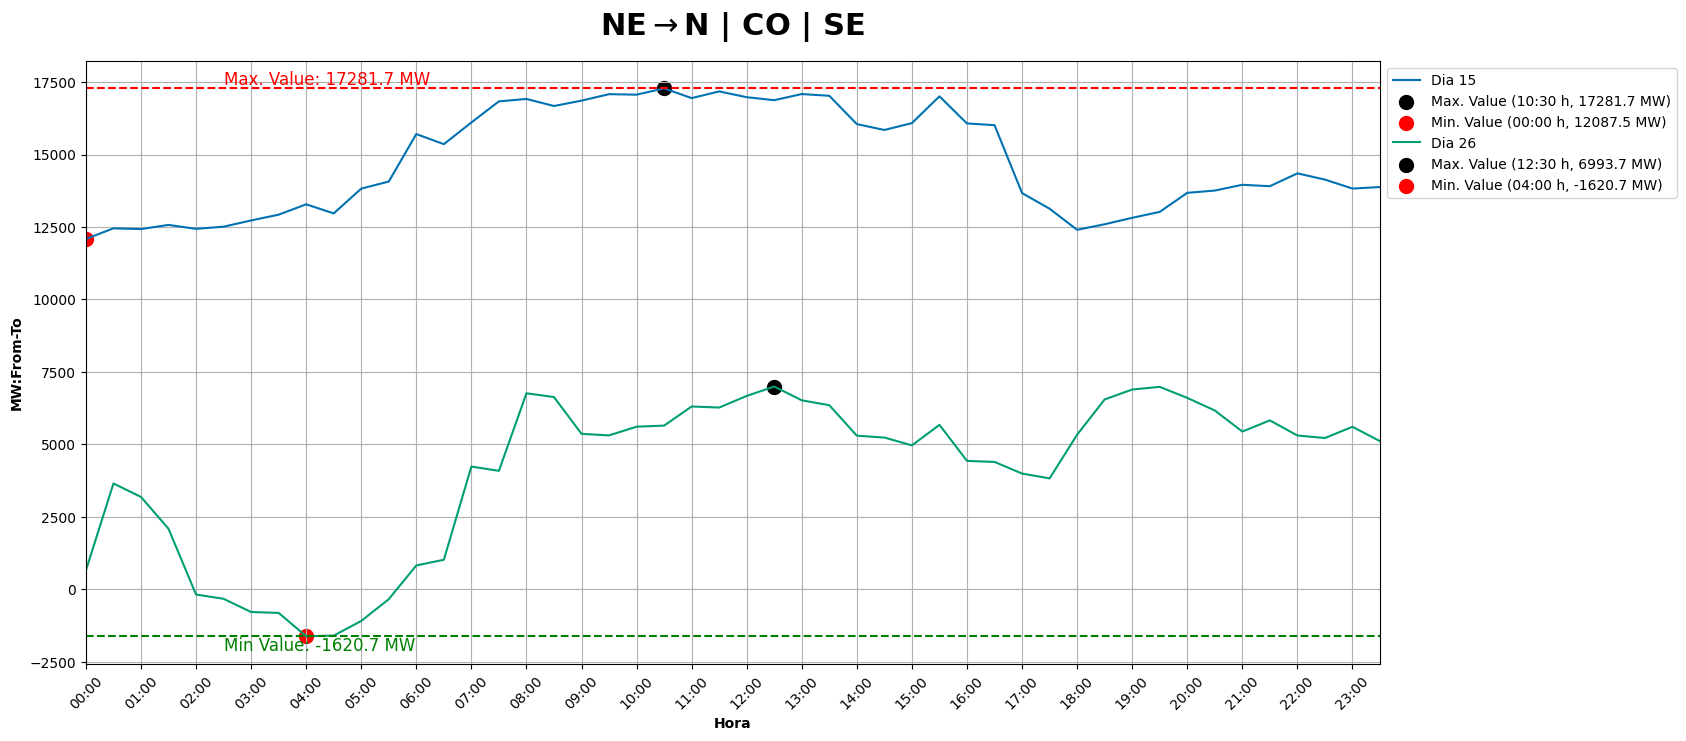

In [22]:
min_max_plot(EXPNE, 'MW:From-To', 'NE', 'N | CO | SE')

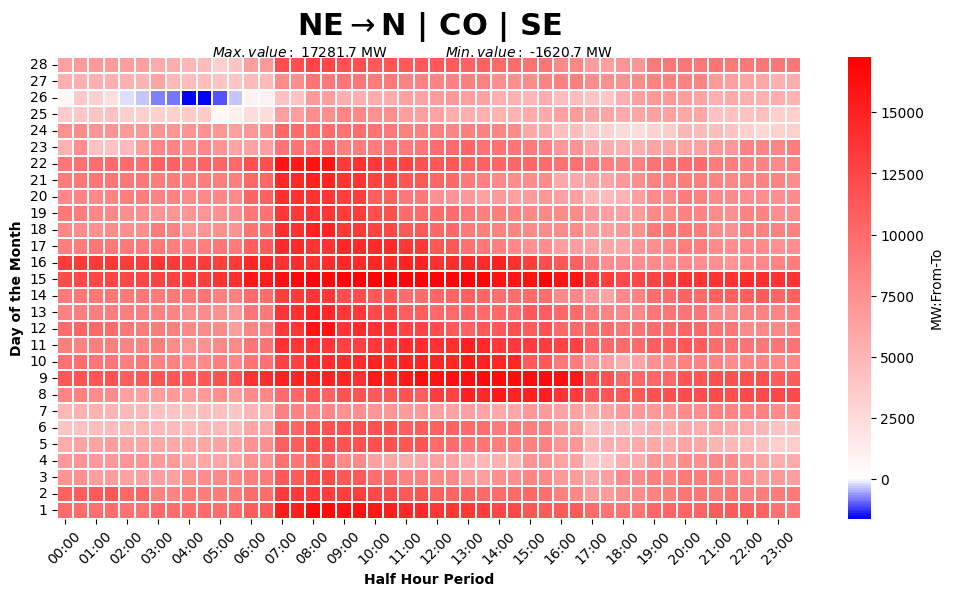

In [23]:
flow_heatmap(EXPNE, 'MW:From-To', 'NE', 'N | CO | SE')

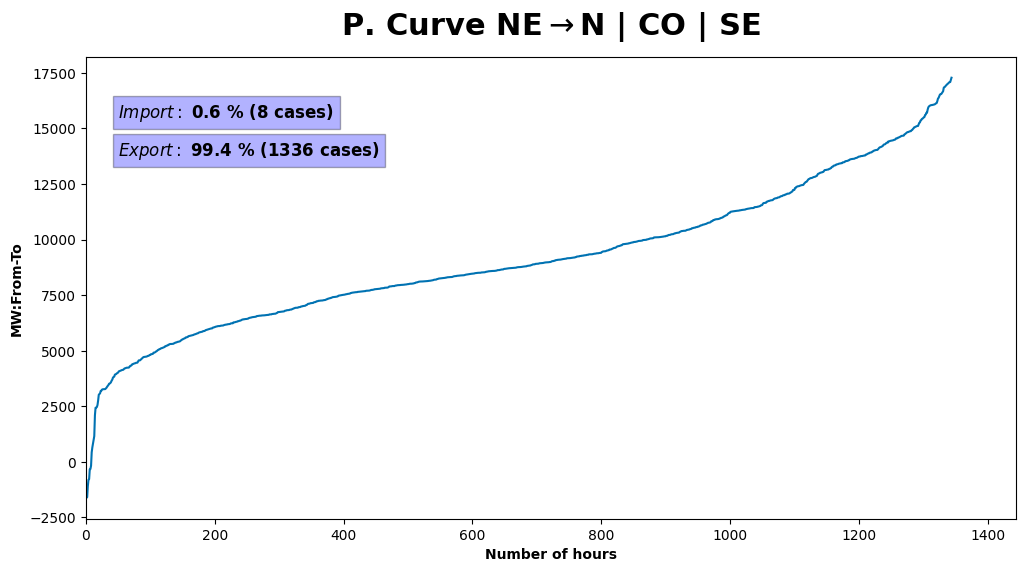

In [24]:
persistency_curve(EXPNE, 'MW:From-To', 'NE', 'N | CO | SE', 50, 15500, 1700)

<b><h2 style="color:#FF851B;">MVAr</h2></b>

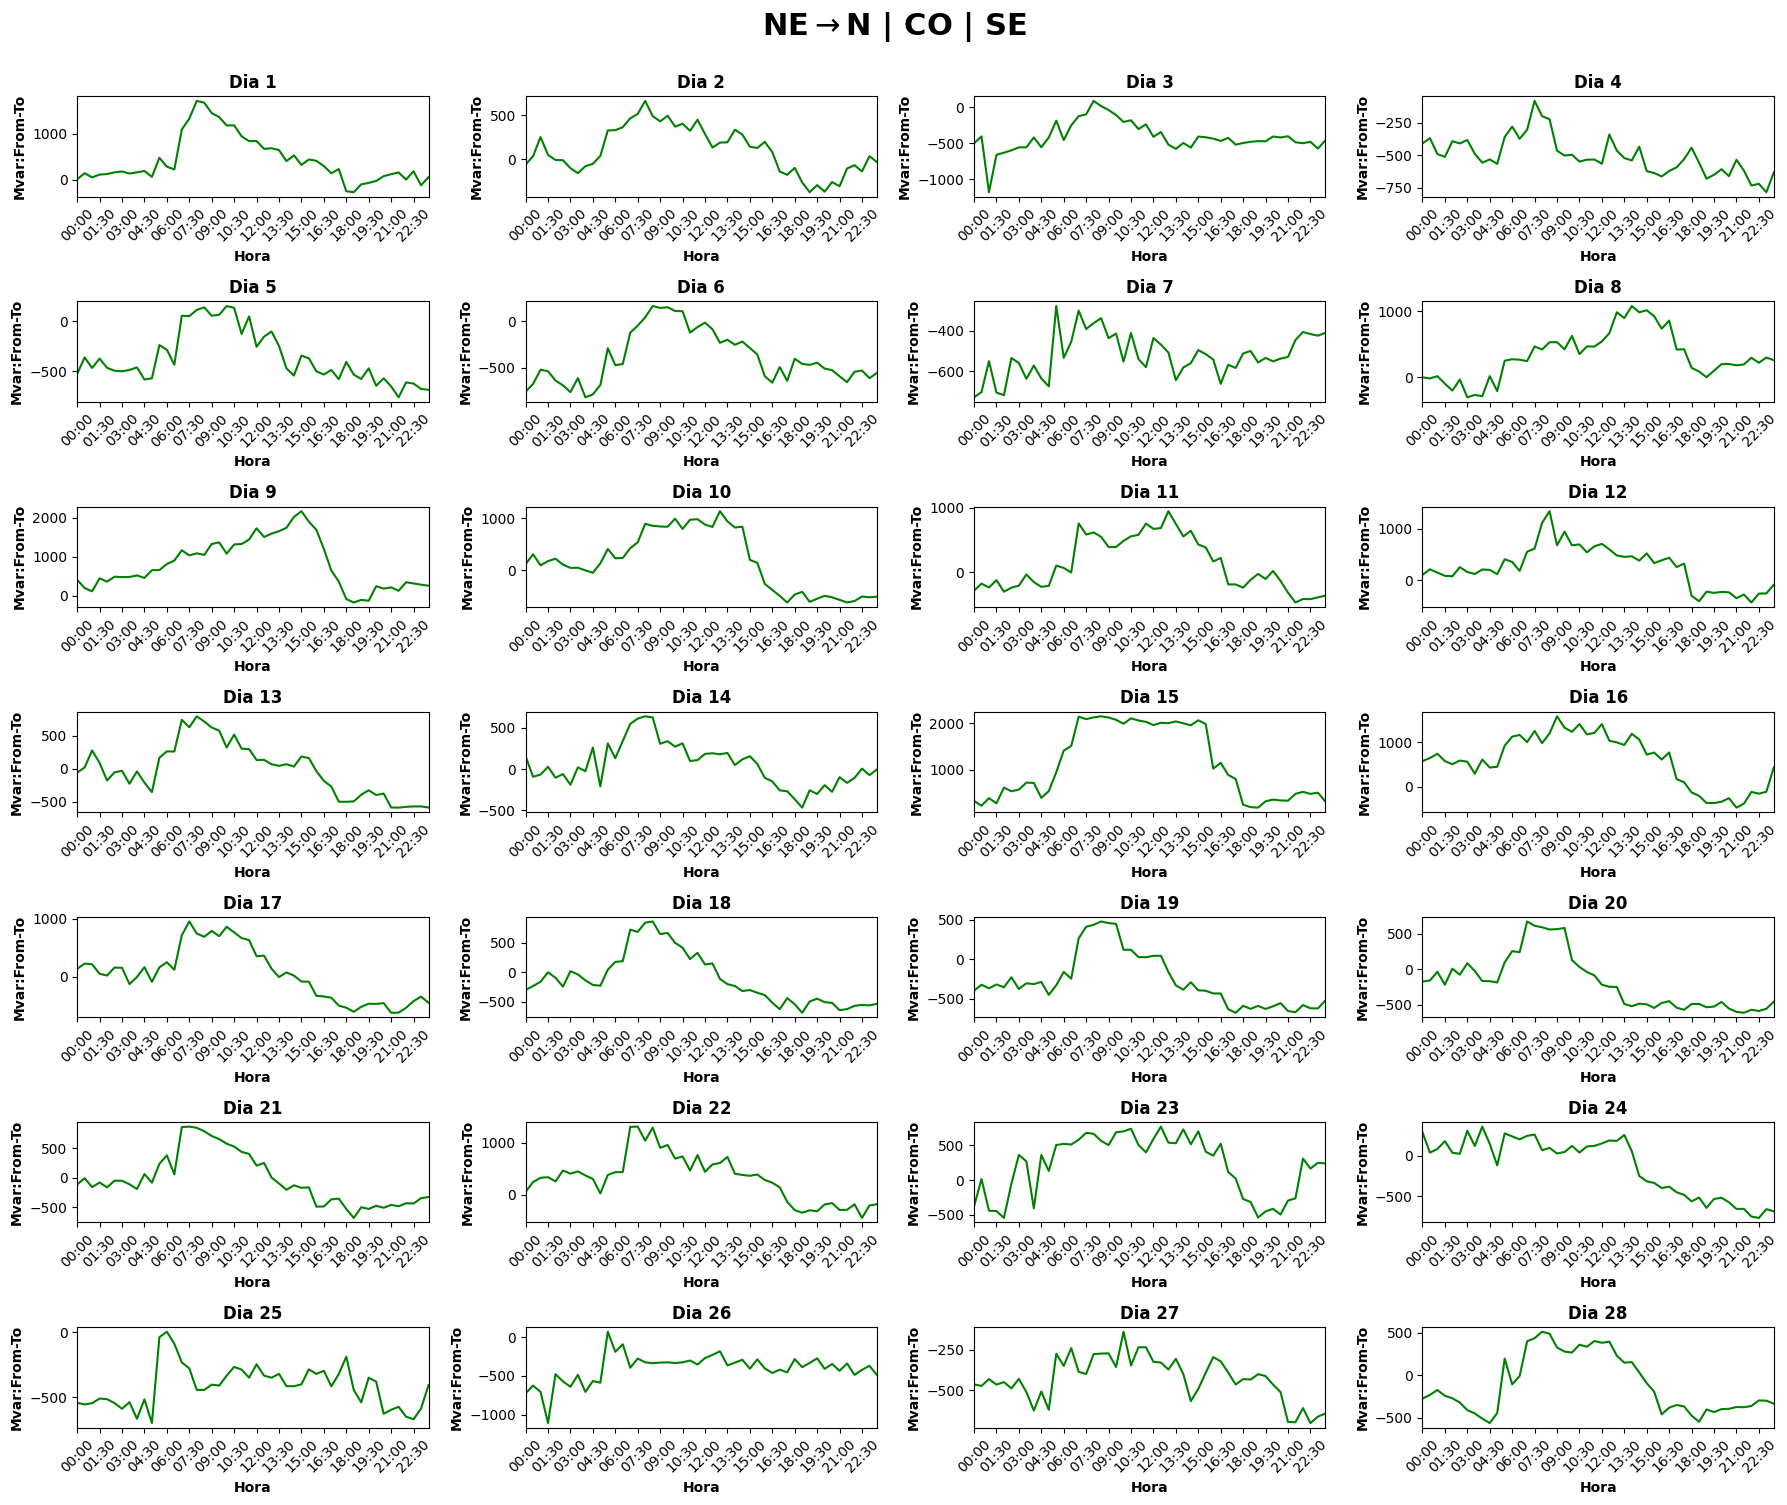

In [25]:
general_plot(EXPNE, 'Mvar:From-To', 'NE', 'N | CO | SE')

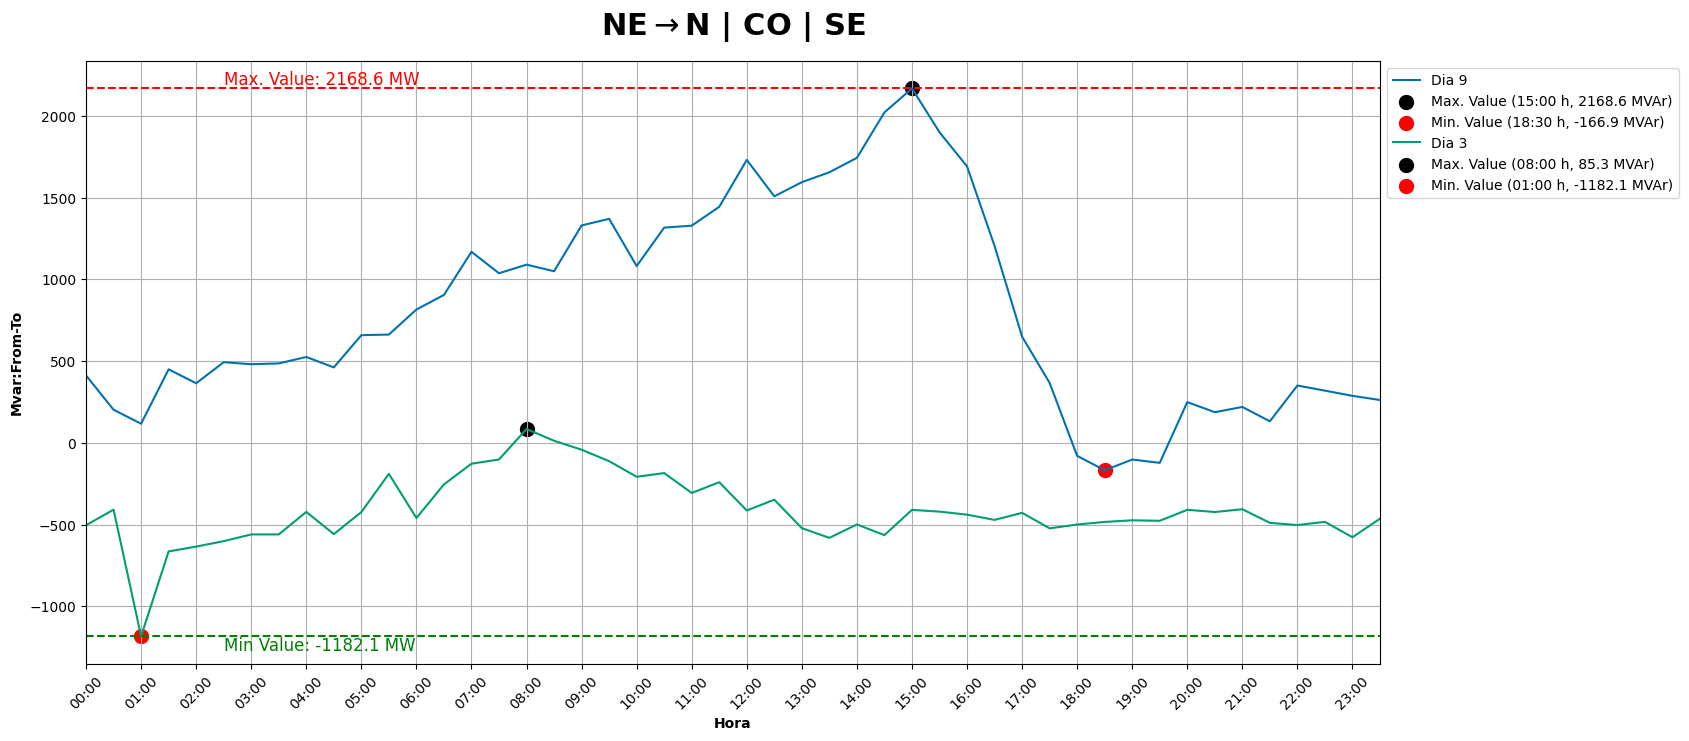

In [26]:
min_max_plot(EXPNE, 'Mvar:From-To', 'NE', 'N | CO | SE')

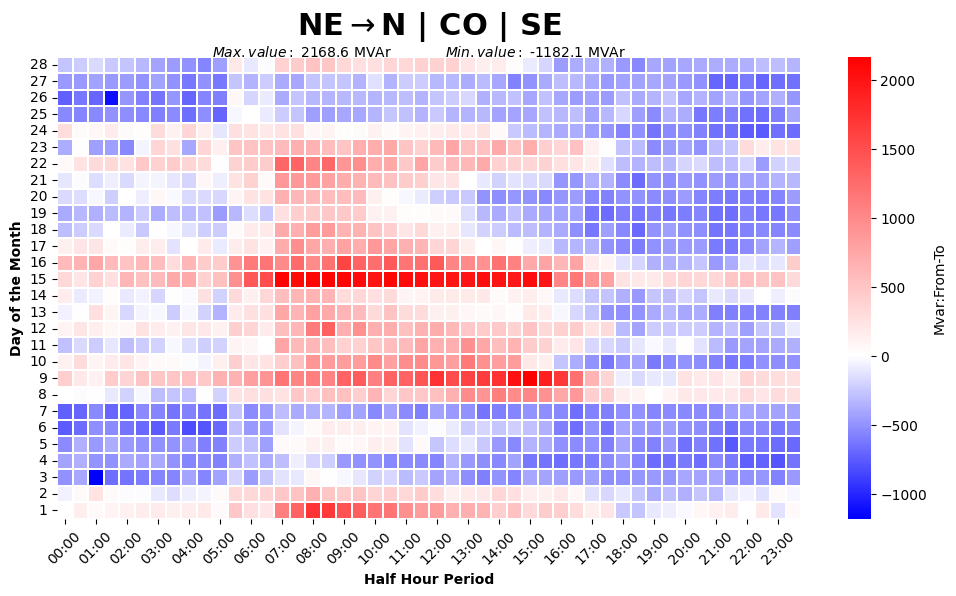

In [27]:
flow_heatmap(EXPNE, 'Mvar:From-To', 'NE', 'N | CO | SE') # Only Export

<b><h1 style="color:#7FDBFF;">NE-SE interface (Northeast & SouthEast)</h1></b>

In [16]:
EXPNESE_grouped = dataset_grouped(PWF16_Filt, linhas_FNESE, linhas_FNESE_flip, 1)

In [17]:
EXPNESE = EXPNESE_grouped.groupby(['Dia', 'Hora']).agg({'MW:From-To': sum, 'Mvar:From-To': sum, '% L1': sum})
EXPNESE = EXPNESE.reset_index()
EXPNESE['Hora'] = pd.to_datetime(EXPNESE['Hora'], format='%H-%M').dt.strftime('%H:%M')
EXPNESE

Dia   Hora  MW:From-To  Mvar:From-To    % L1
0       2  00:00      5173.8       -1061.9  198.68
1       2  00:30      4907.4       -1097.7  190.76
2       2  01:00      4435.3       -1314.2  174.20
3       2  01:30      3982.0       -1397.6  159.38
4       2  02:00      3937.7       -1312.9  157.65
...   ...    ...         ...           ...     ...
1339   29  21:30      4874.3       -1132.2  188.19
1340   29  22:00      4826.1       -1267.3  187.99
1341   29  22:30      4779.0       -1235.1  185.59
1342   29  23:00      4759.8       -1277.8  184.94
1343   29  23:30      4702.3       -1289.3  182.58

[1344 rows x 5 columns]

<b><h2 style="color:#FF851B;">MW</h2></b>

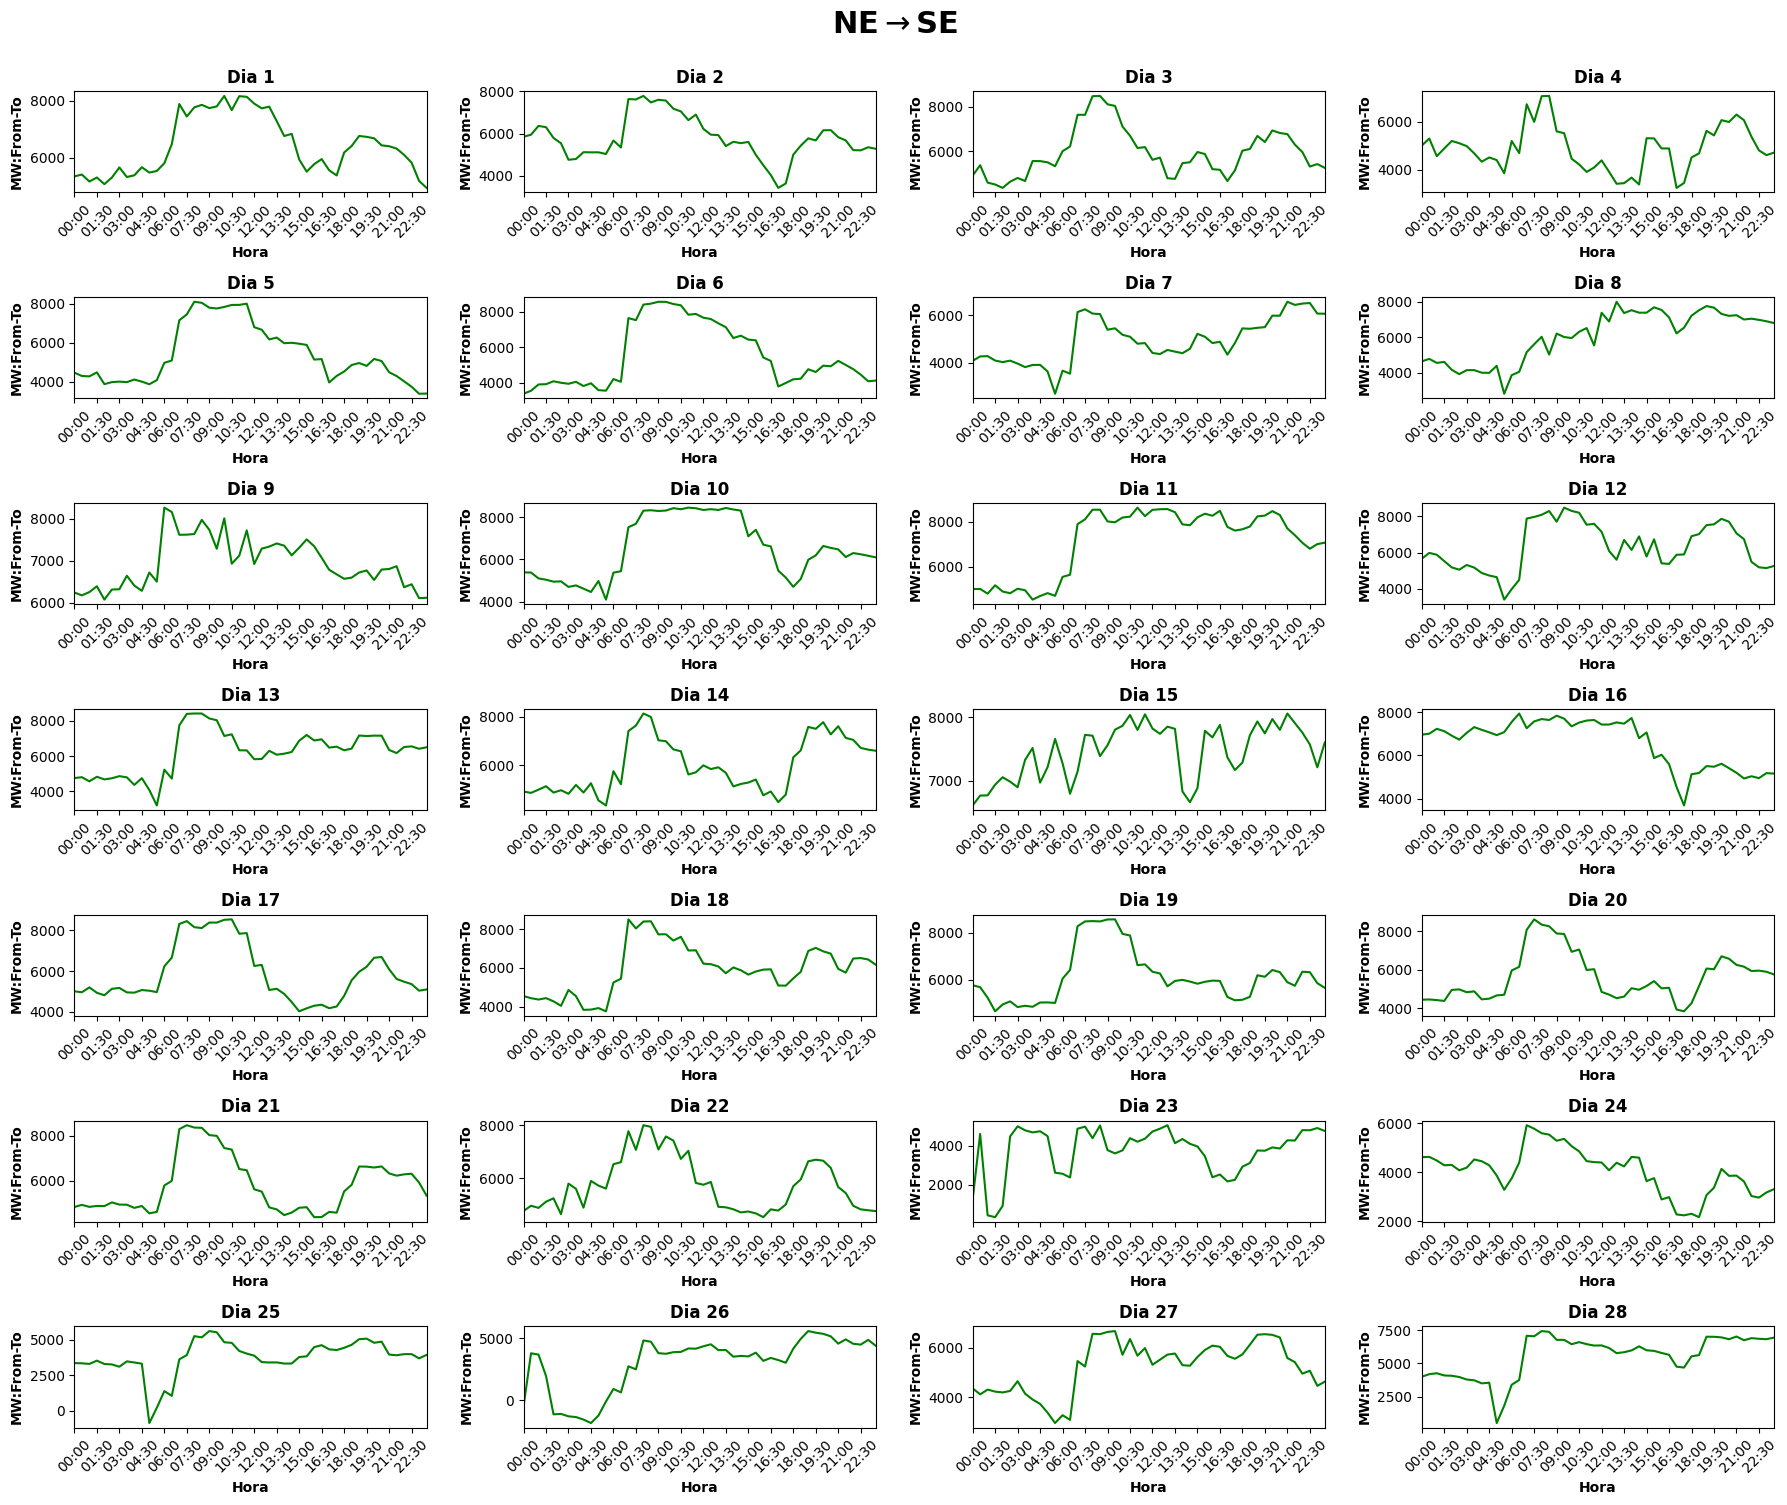

In [30]:
general_plot(EXPNESE, 'MW:From-To', 'NE', 'SE')

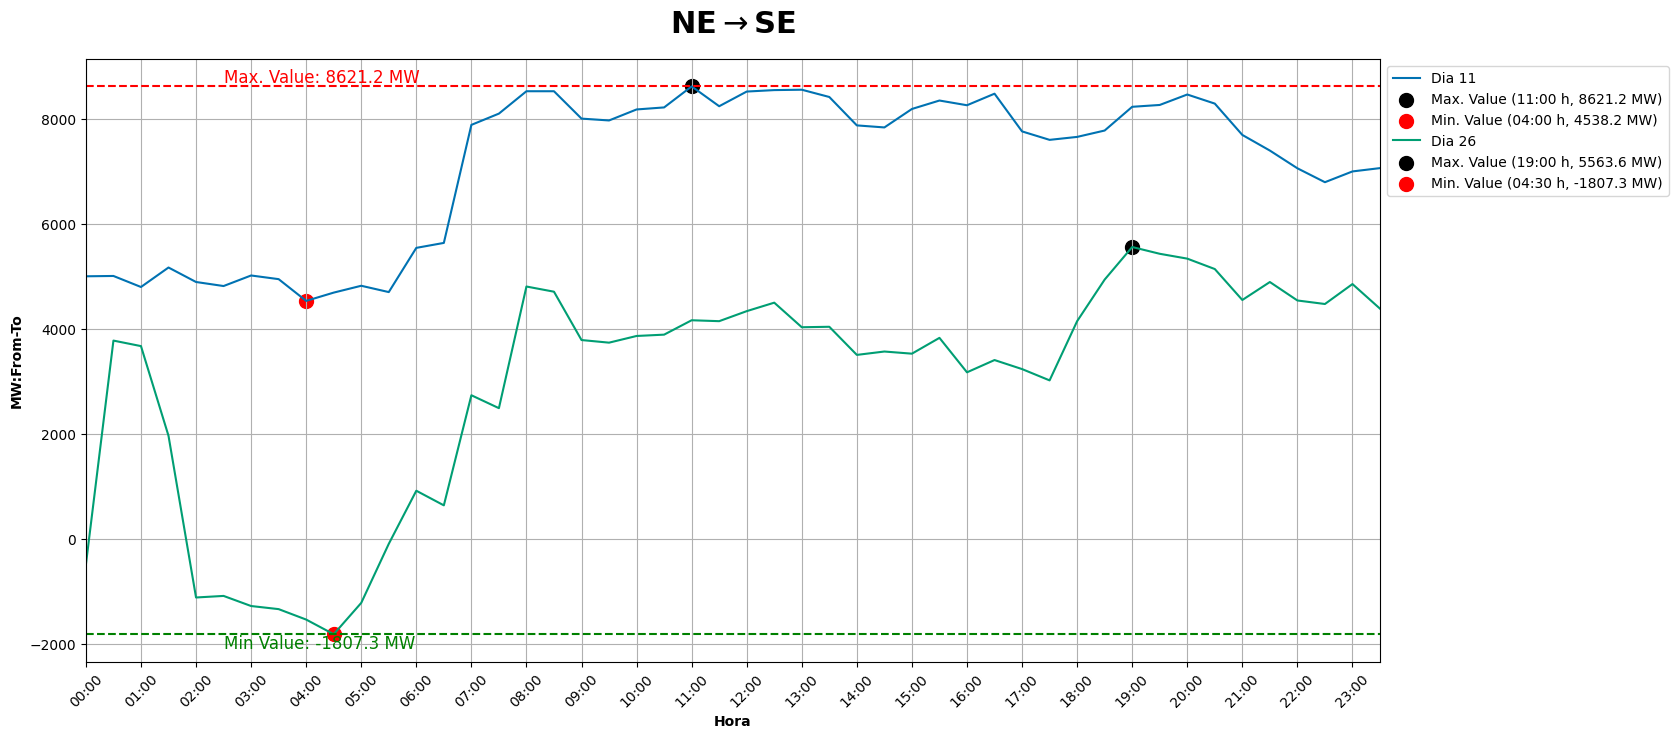

In [31]:
min_max_plot(EXPNESE, 'MW:From-To', 'NE', 'SE')

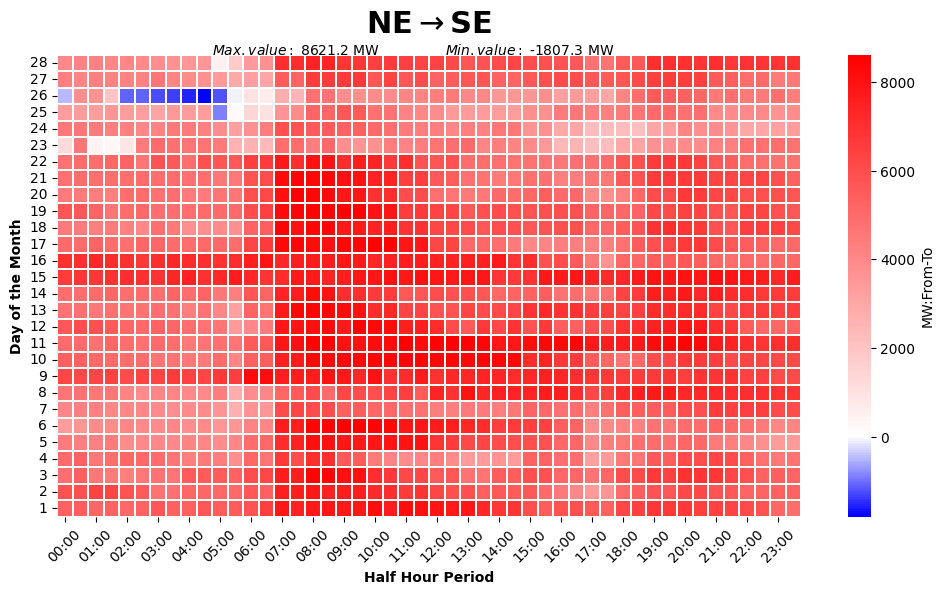

In [32]:
flow_heatmap(EXPNESE, 'MW:From-To', 'NE', 'SE')

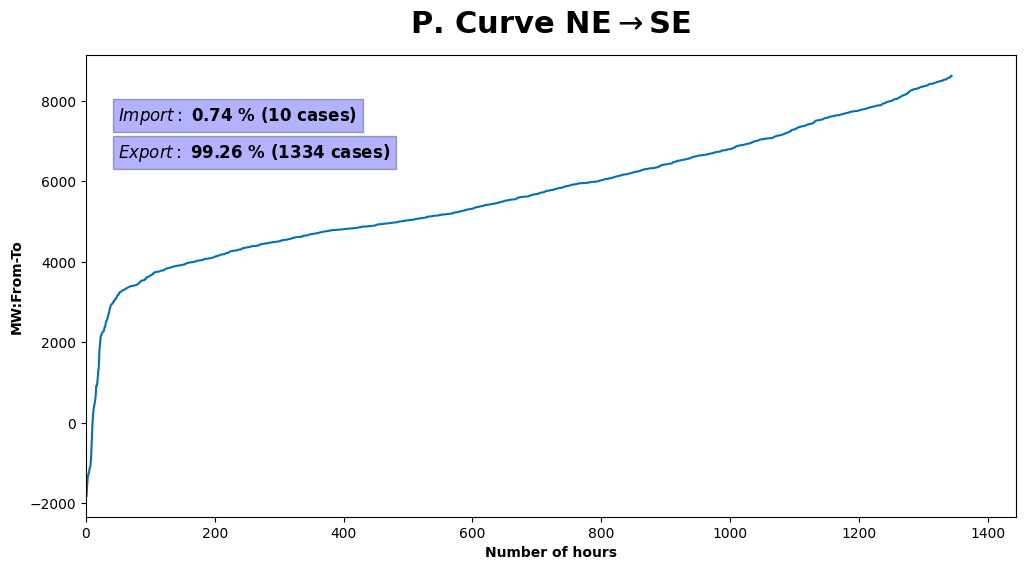

In [33]:
persistency_curve(EXPNESE, 'MW:From-To', 'NE', 'SE', 50, 7500, 900)

<b><h2 style="color:#FF851B;">MVAr</h2></b>

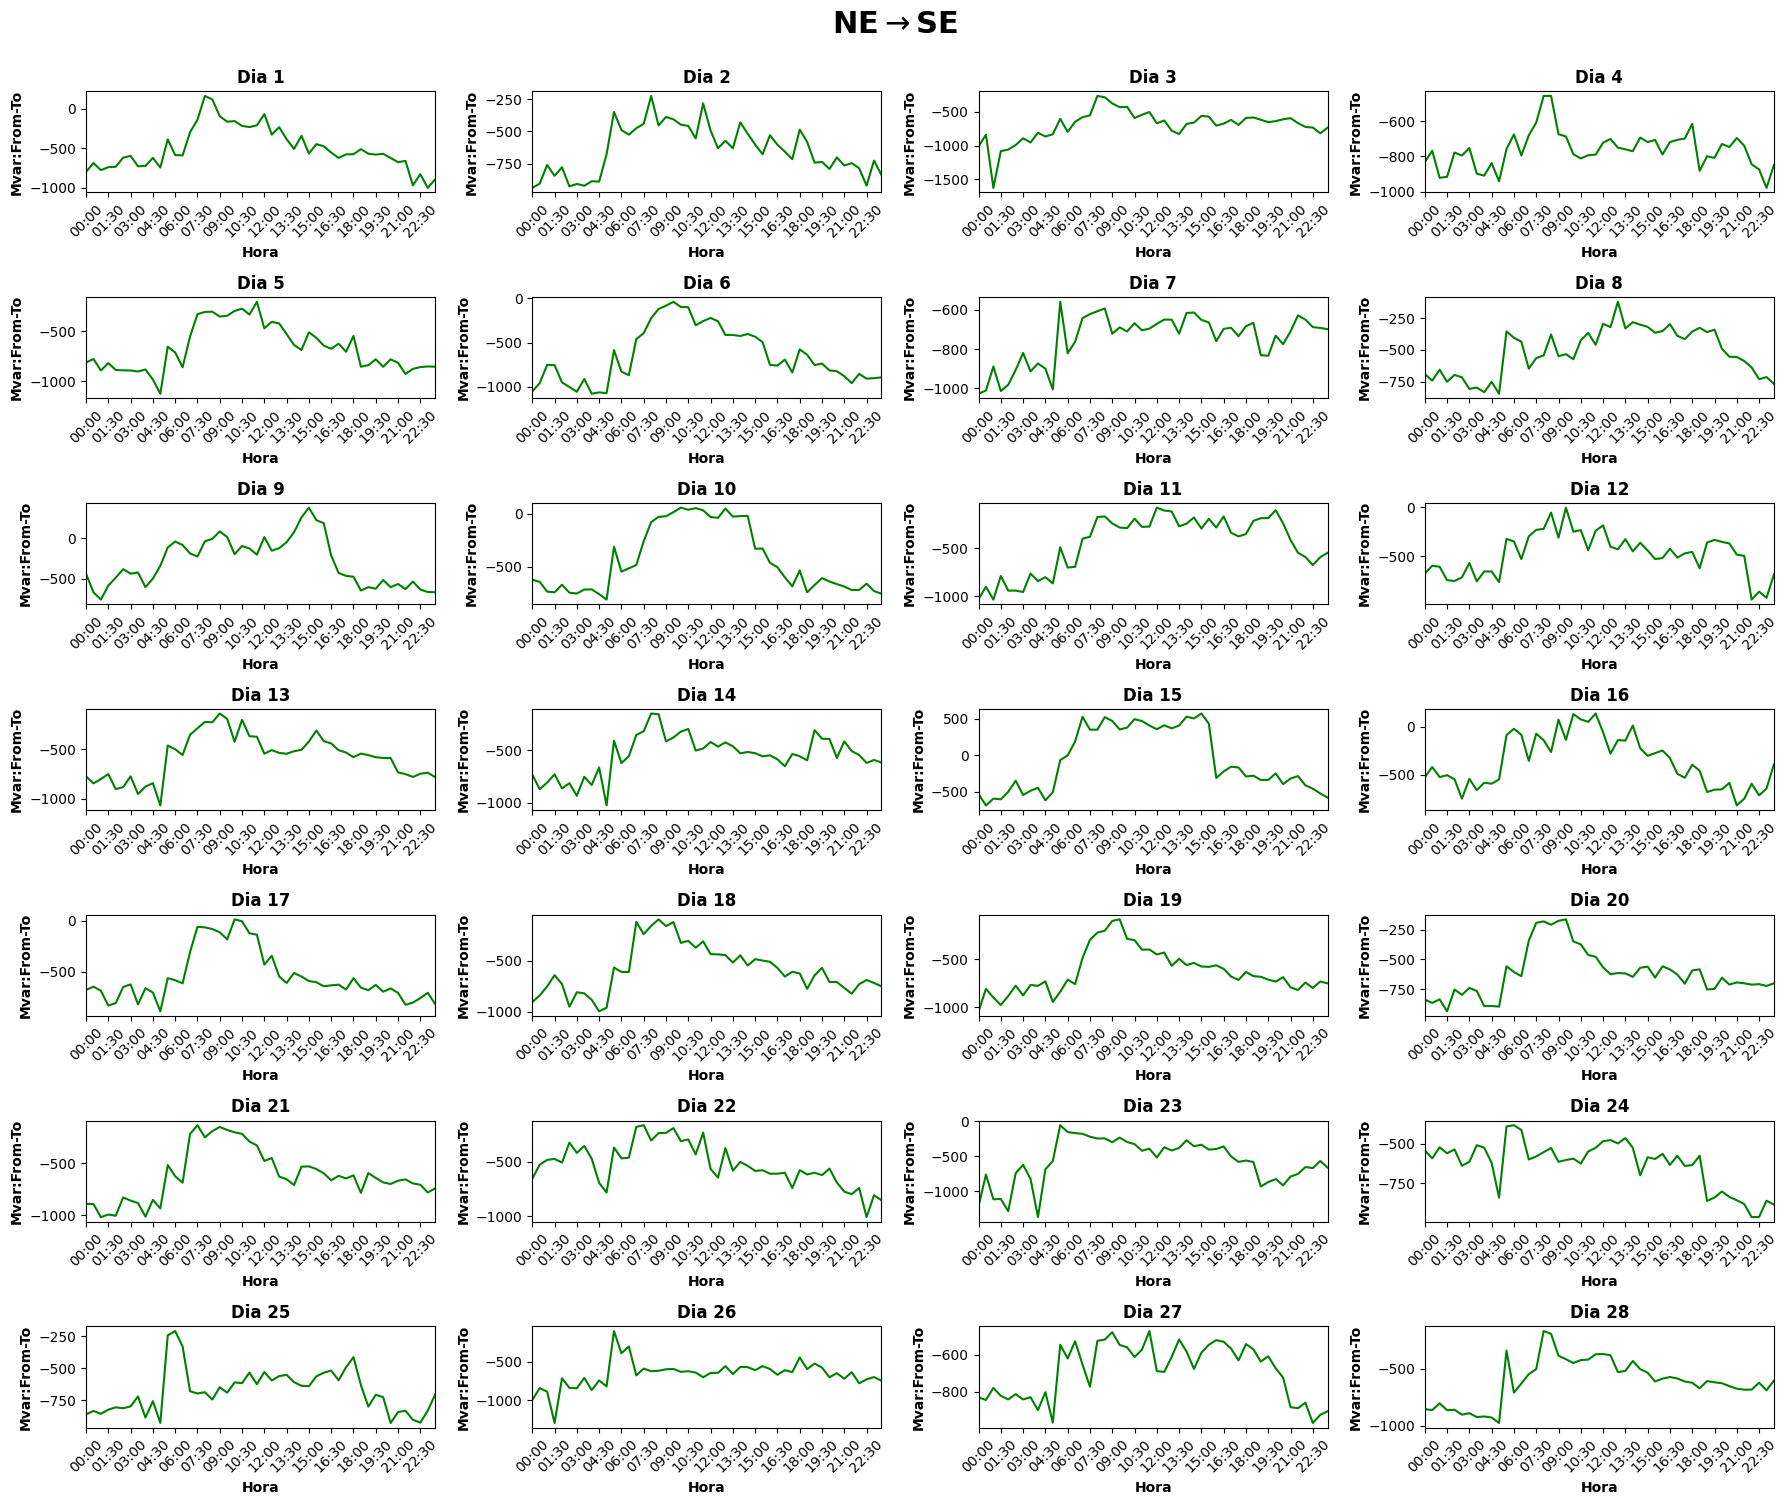

In [34]:
general_plot(EXPNESE, 'Mvar:From-To', 'NE', 'SE')

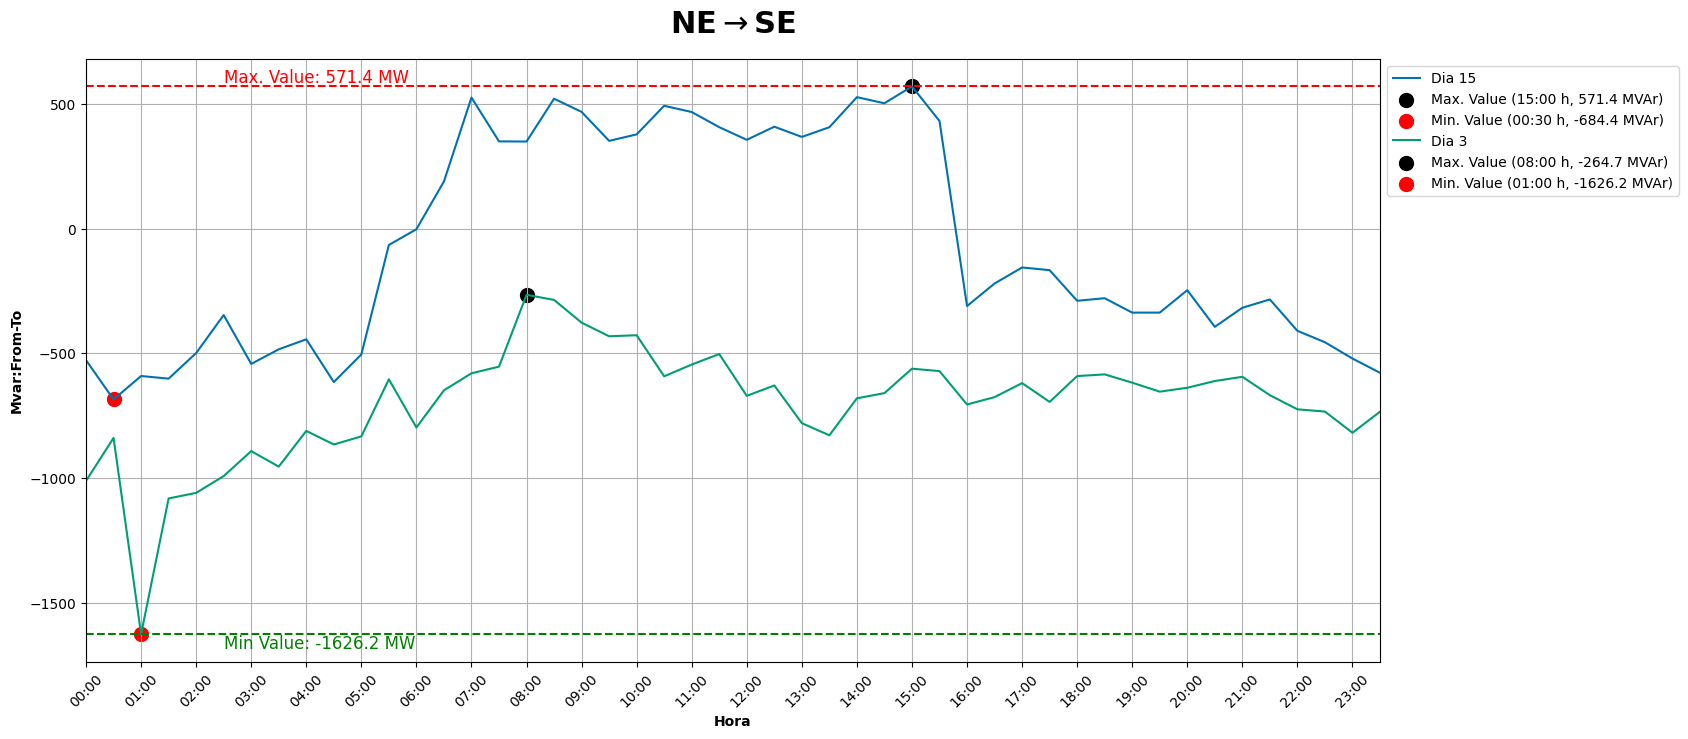

In [35]:
min_max_plot(EXPNESE, 'Mvar:From-To', 'NE', 'SE')

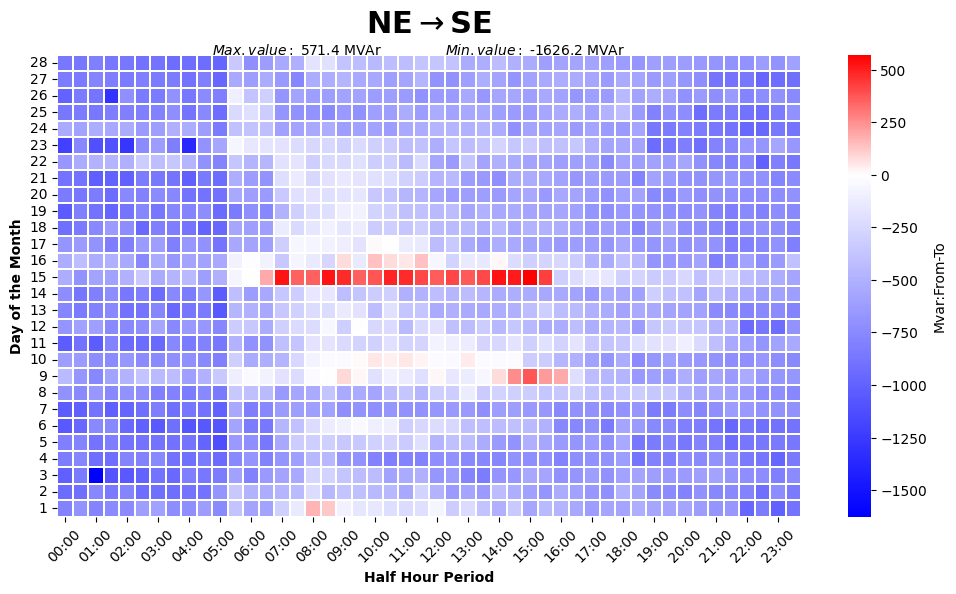

In [36]:
flow_heatmap(EXPNESE, 'Mvar:From-To', 'NE', 'SE')

<b><h1 style="color:#7FDBFF;">NE-N interface (Northeast & North)</h1></b>

In [18]:
EXPNEN_grouped = dataset_grouped(PWF16_Filt, linhas_FNEN, linhas_FNEN_flip, 1)

In [19]:
EXPNEN = EXPNEN_grouped.groupby(['Dia', 'Hora']).agg({'MW:From-To': sum, 'Mvar:From-To': sum, '% L1': sum})
EXPNEN = EXPNEN.reset_index()
EXPNEN['Hora'] = pd.to_datetime(EXPNEN['Hora'], format='%H-%M').dt.strftime('%H:%M')
EXPNEN

Dia   Hora  MW:From-To  Mvar:From-To    % L1
0       2  00:00      1532.4         164.9  122.42
1       2  00:30      1672.2         249.9  132.56
2       2  01:00      1999.5         271.9  145.36
3       2  01:30      2312.9         282.7  156.62
4       2  02:00      2260.5         248.5  152.93
...   ...    ...         ...           ...     ...
1339   29  21:30      4611.2         148.7  247.04
1340   29  22:00      4652.9         295.1  248.10
1341   29  22:30      4404.1         295.3  236.82
1342   29  23:00      4243.1         248.6  229.49
1343   29  23:30      4016.1         220.7  218.93

[1344 rows x 5 columns]

<b><h2 style="color:#FF851B;">MW</h2></b>

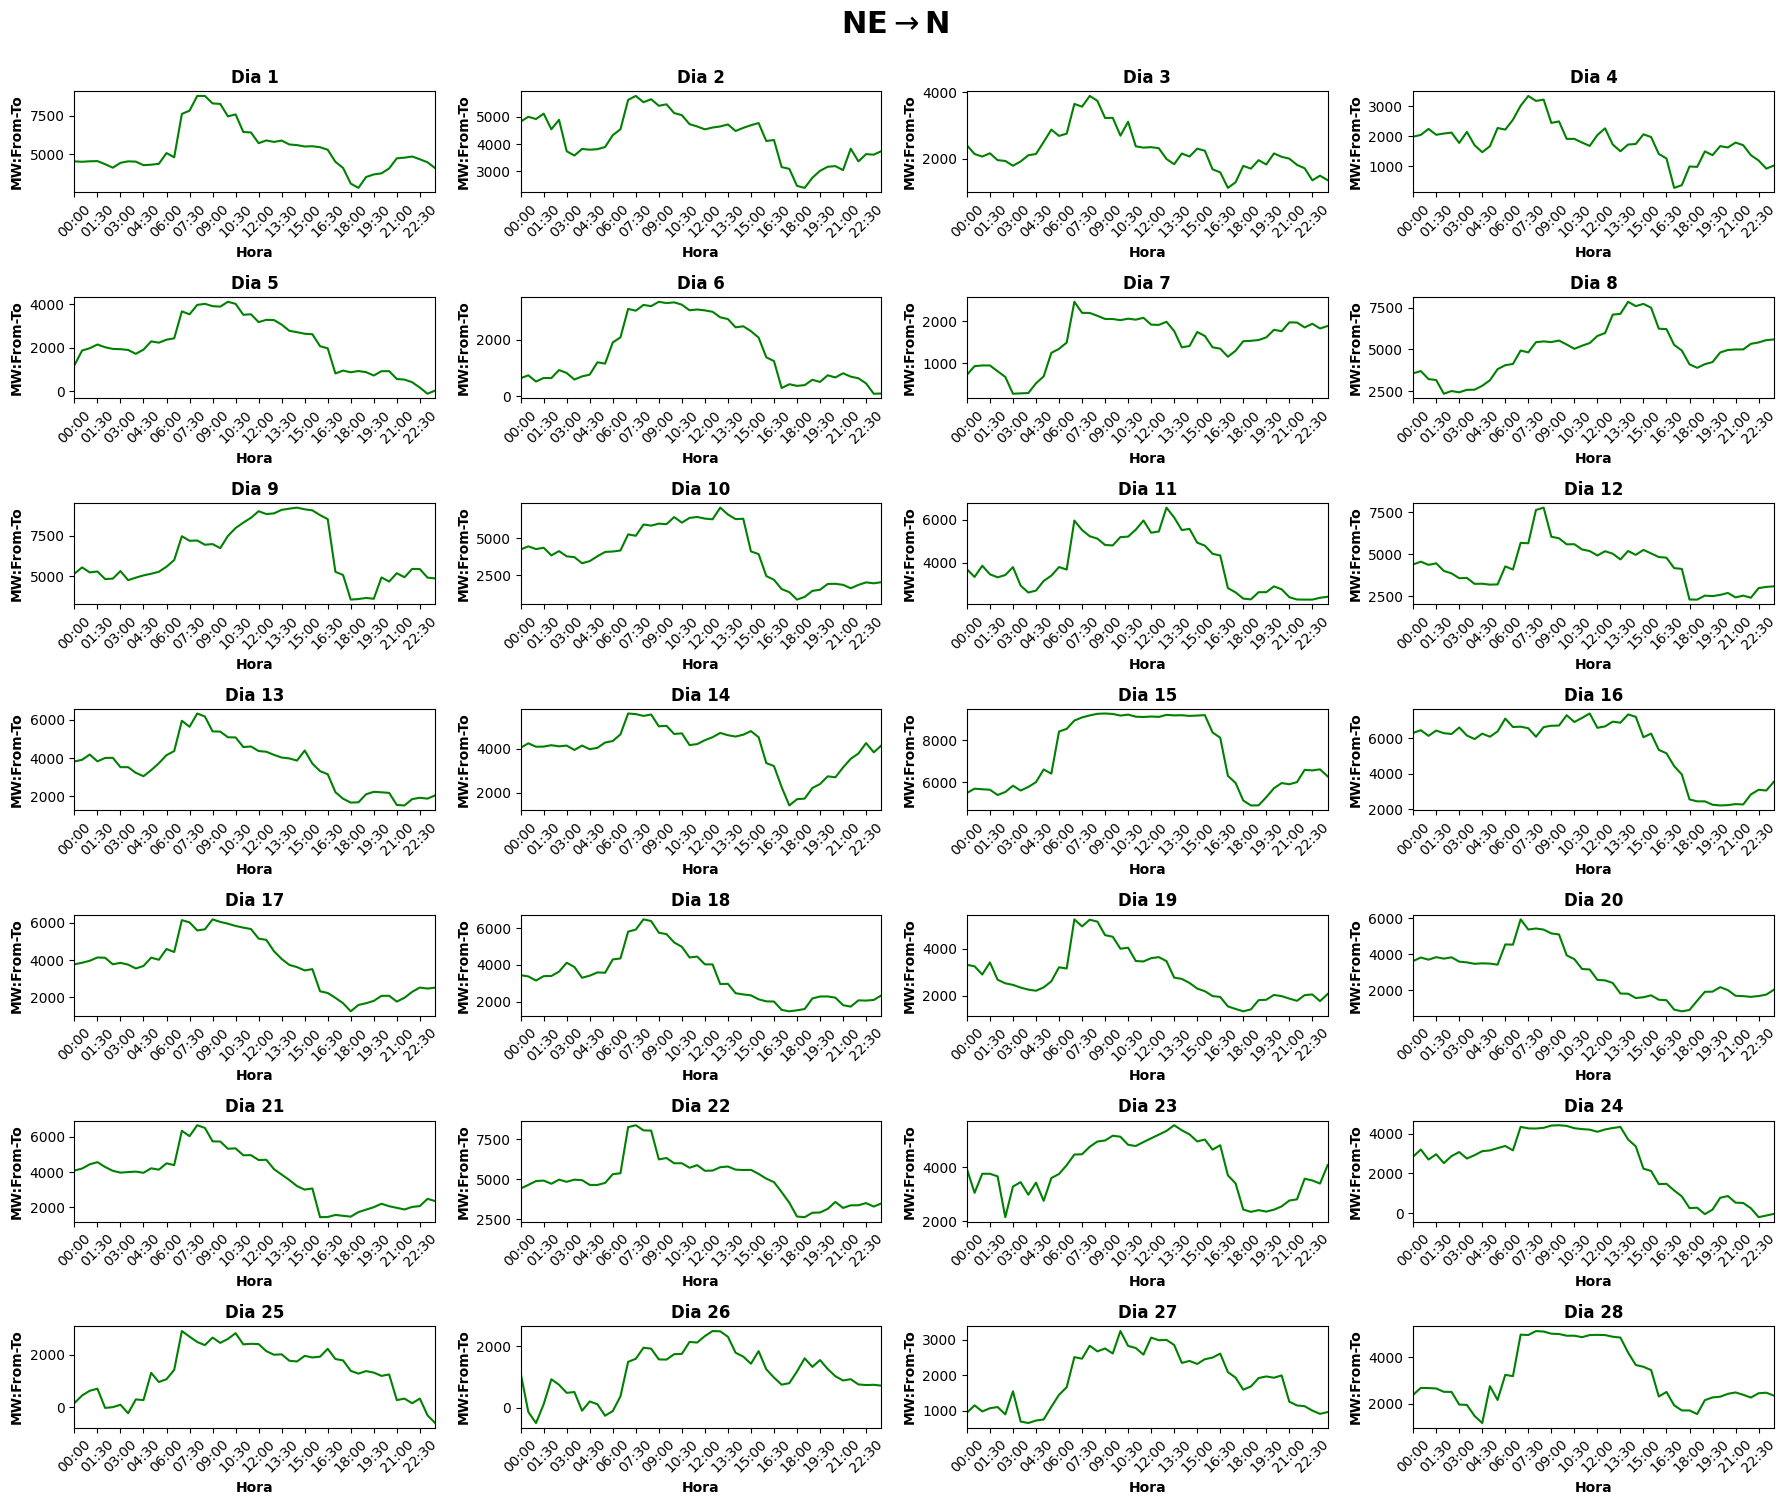

In [39]:
general_plot(EXPNEN, 'MW:From-To', 'NE', 'N')

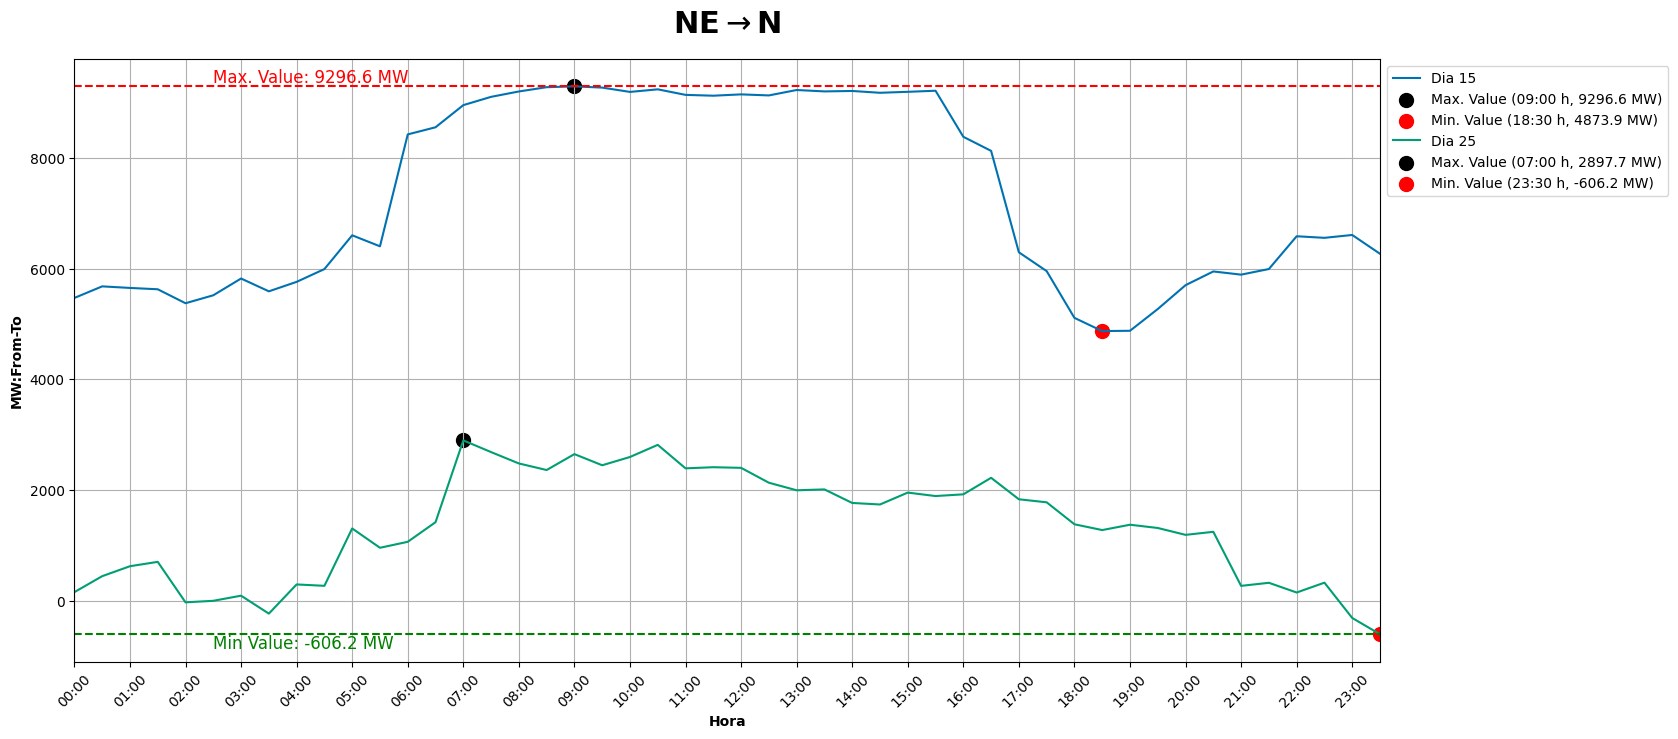

In [40]:
min_max_plot(EXPNEN, 'MW:From-To', 'NE', 'N')

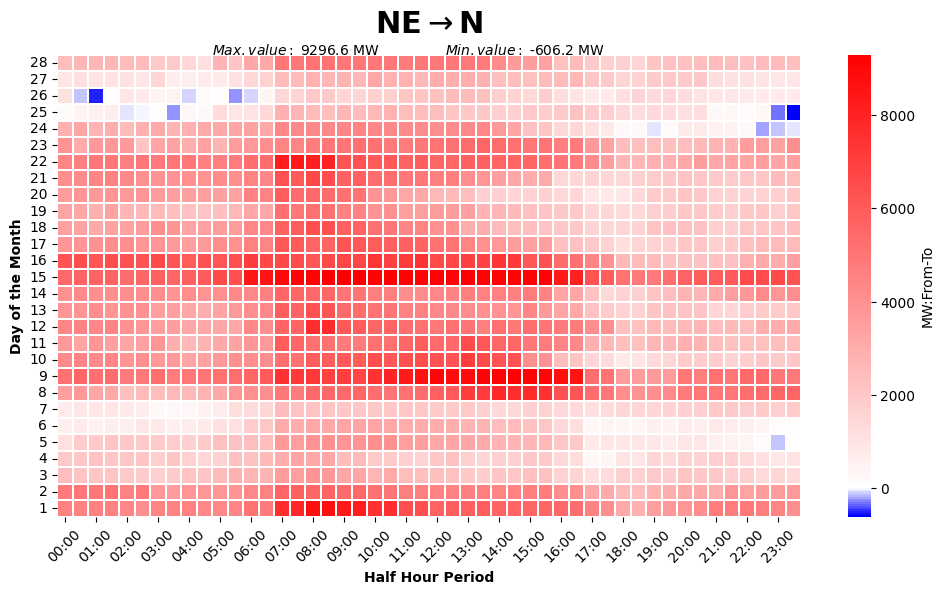

In [41]:
flow_heatmap(EXPNEN, 'MW:From-To', 'NE', 'N')

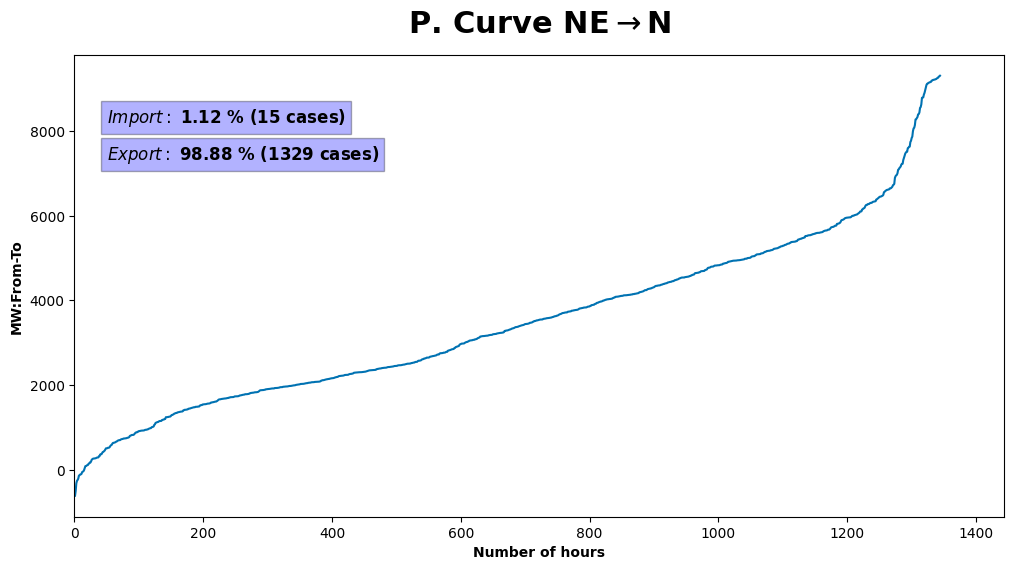

In [42]:
persistency_curve(EXPNEN, 'MW:From-To', 'NE', 'N', 50, 8200, 880)

<b><h2 style="color:#FF851B;">MVAr</h2></b>

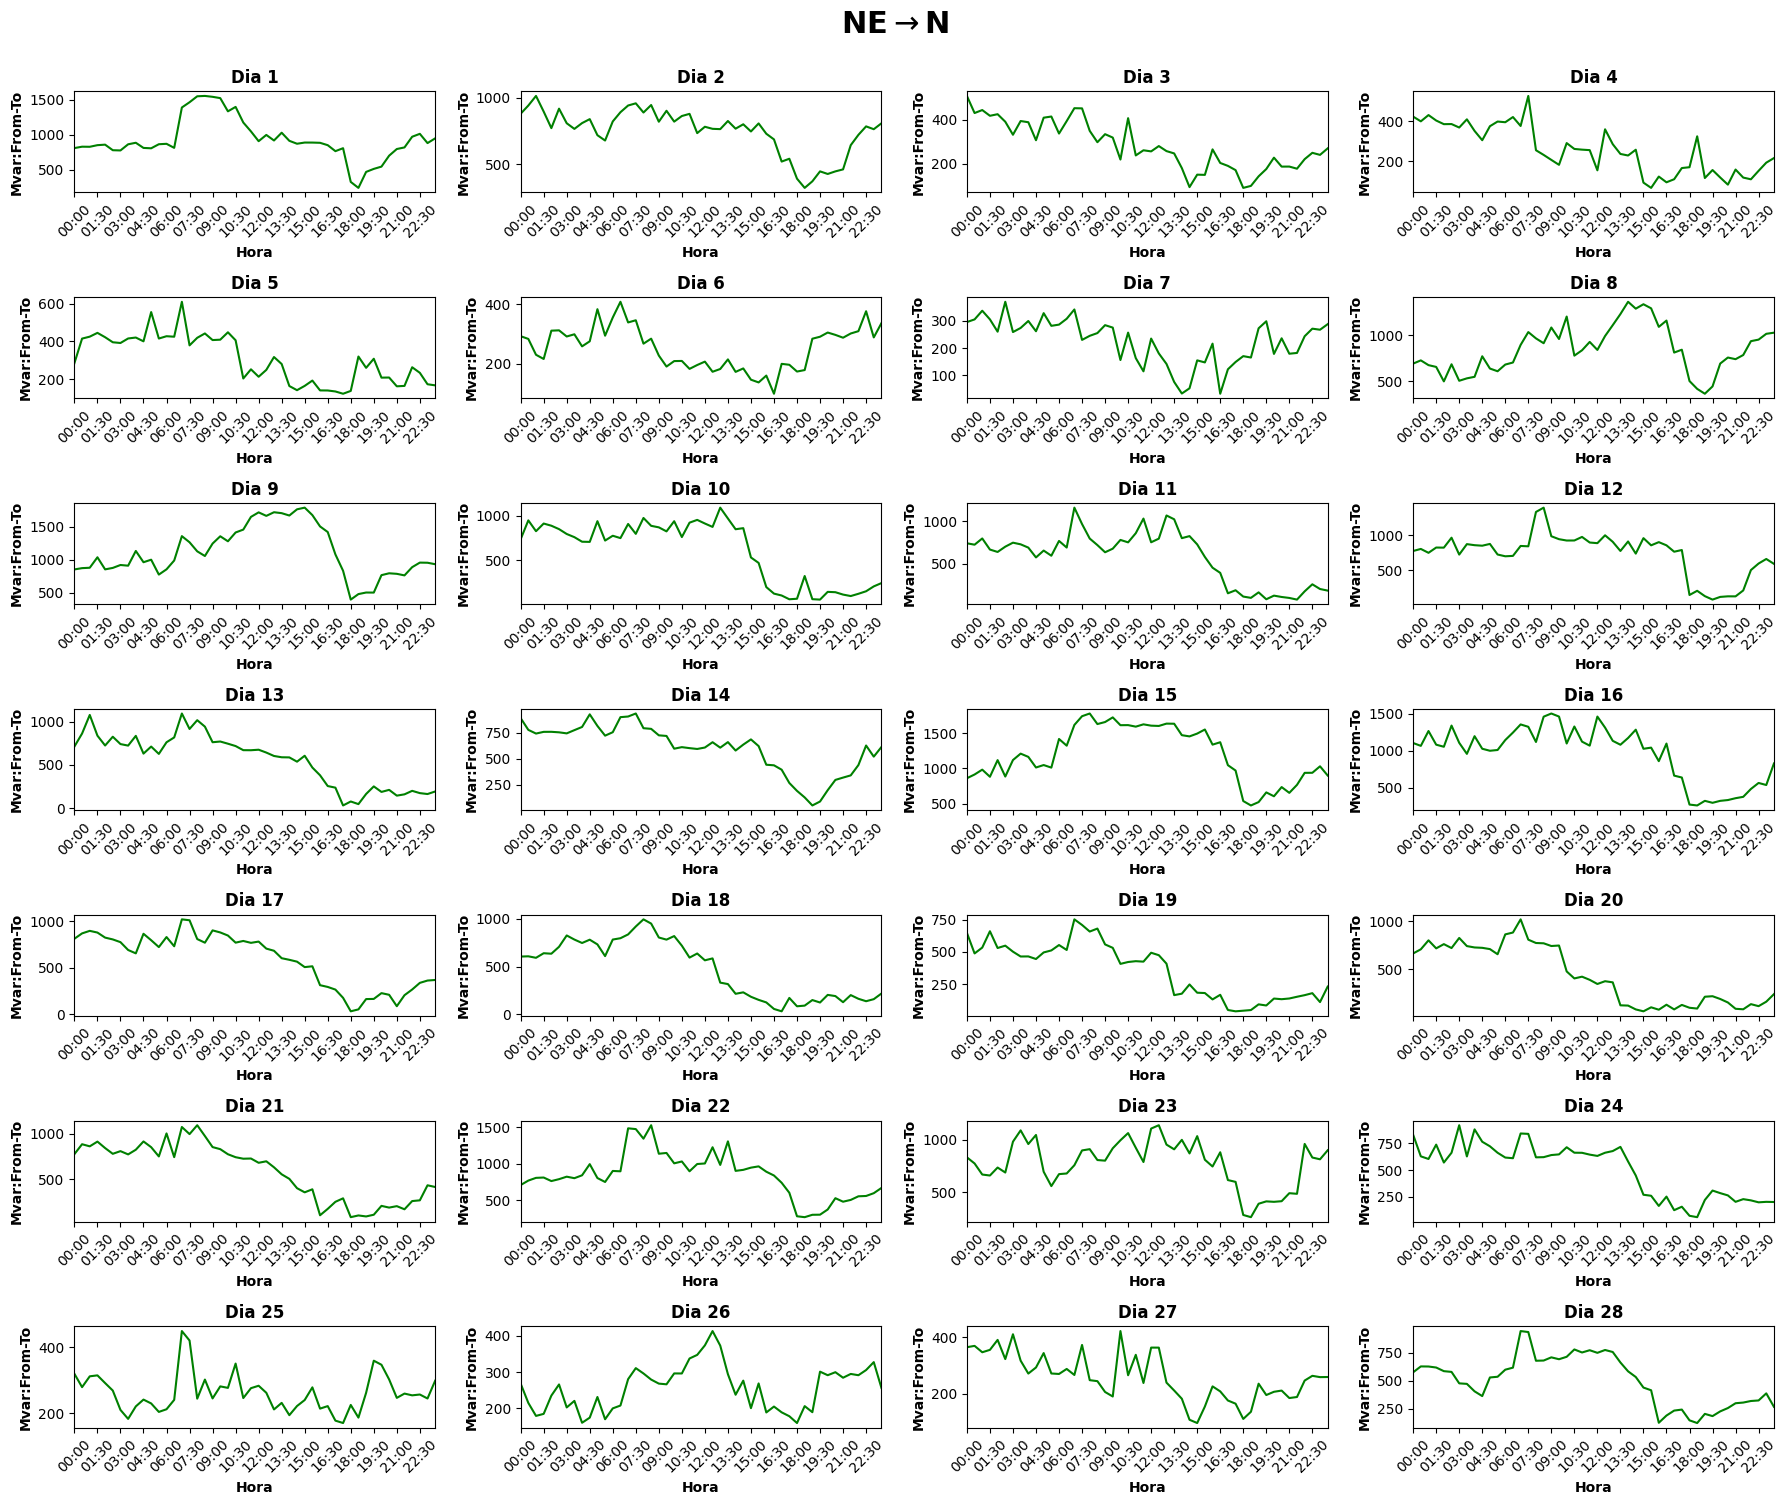

In [43]:
general_plot(EXPNEN, 'Mvar:From-To', 'NE', 'N')

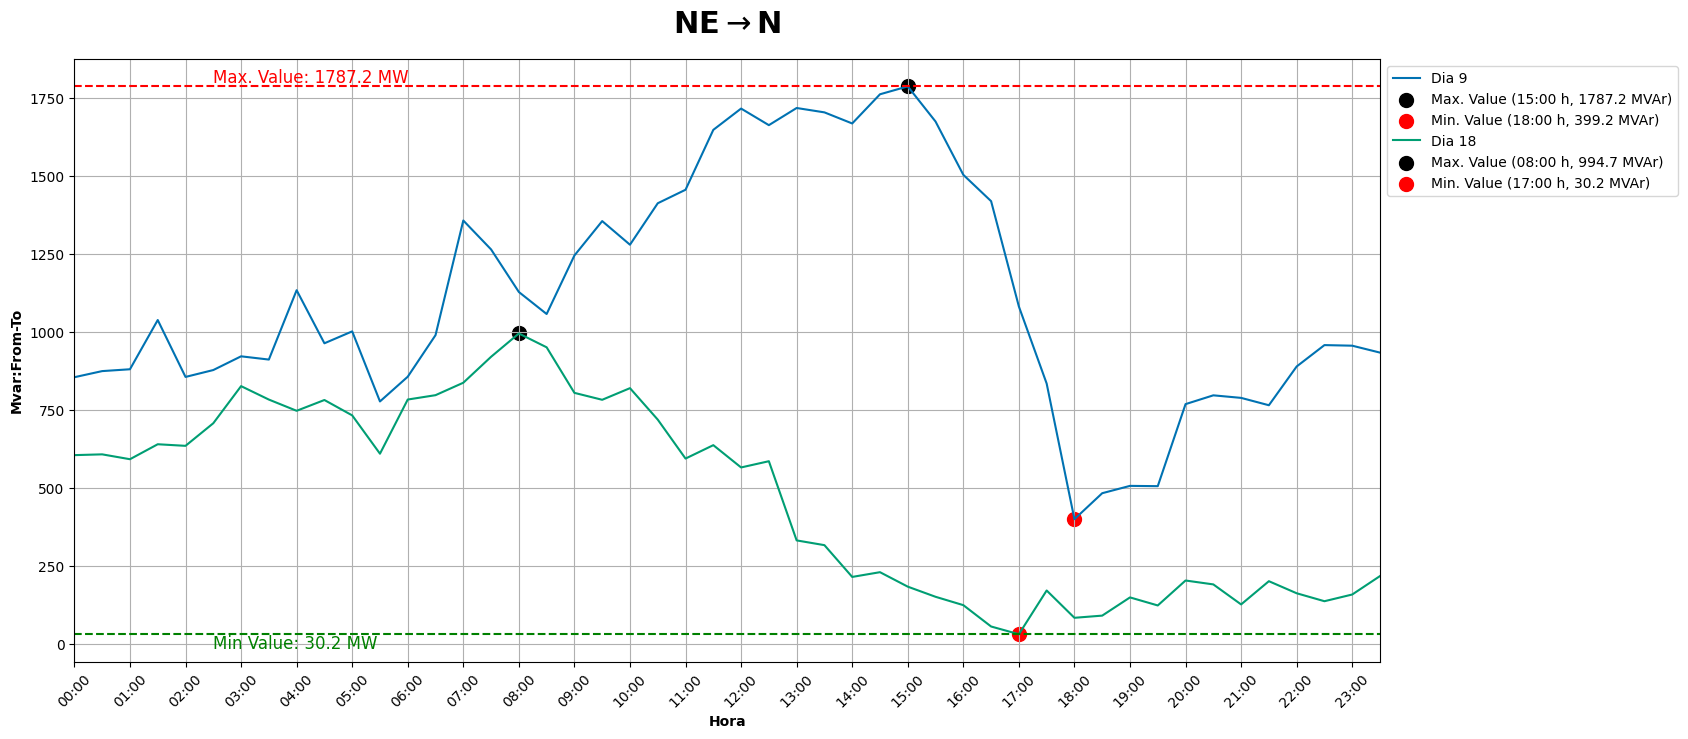

In [44]:
min_max_plot(EXPNEN, 'Mvar:From-To', 'NE', 'N')

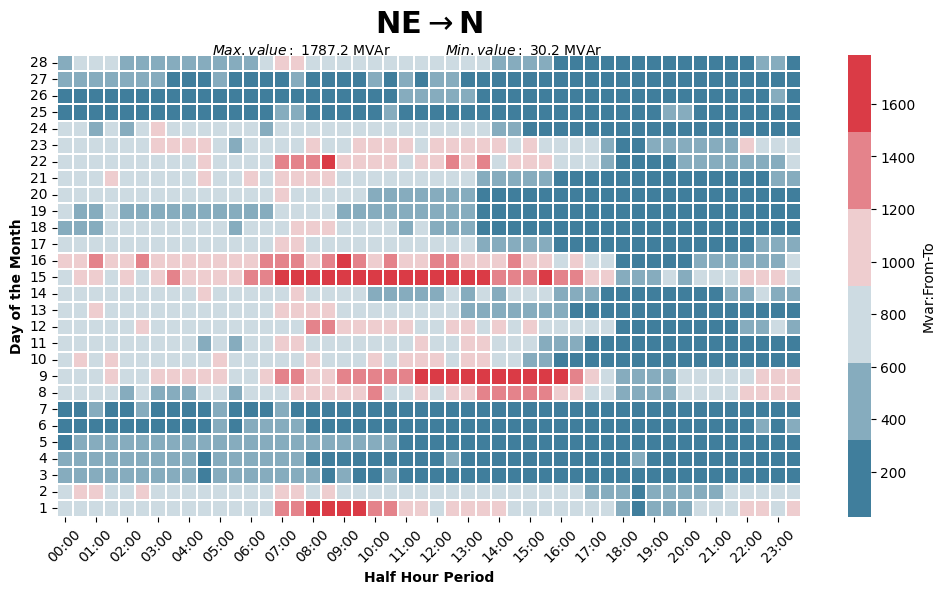

In [45]:
flow_heatmap(EXPNEN, 'Mvar:From-To', 'NE', 'N')

<b><h1 style="color:#7FDBFF;">SUL-SE-CO interface (SUL Export)</h1></b>

In [20]:
EXPSULSECO_grouped = dataset_grouped(PWF16_Filt, linhas_FSULSECO, linhas_FSULSECO_flip, 1)

In [21]:
EXPSULSECO = EXPSULSECO_grouped.groupby(['Dia', 'Hora']).agg({'MW:From-To': sum, 'Mvar:From-To': sum, '% L1': sum})
EXPSULSECO = EXPSULSECO.reset_index()
EXPSULSECO['Hora'] = pd.to_datetime(EXPSULSECO['Hora'], format='%H-%M').dt.strftime('%H:%M')
EXPSULSECO

Dia   Hora  MW:From-To  Mvar:From-To    % L1
0       2  00:00      1227.1       -1468.4  453.94
1       2  00:30      1354.7       -1481.0  460.13
2       2  01:00      1563.9       -1417.0  458.88
3       2  01:30      1816.2       -1419.0  455.70
4       2  02:00      1914.6       -1683.1  455.32
...   ...    ...         ...           ...     ...
1339   29  21:30       510.6       -1626.6  439.50
1340   29  22:00       512.0       -1970.5  461.26
1341   29  22:30       740.7       -1768.7  434.37
1342   29  23:00       545.3       -2275.9  469.45
1343   29  23:30       548.6       -2248.1  464.80

[1344 rows x 5 columns]

<b><h2 style="color:#FF851B;">MW</h2></b>

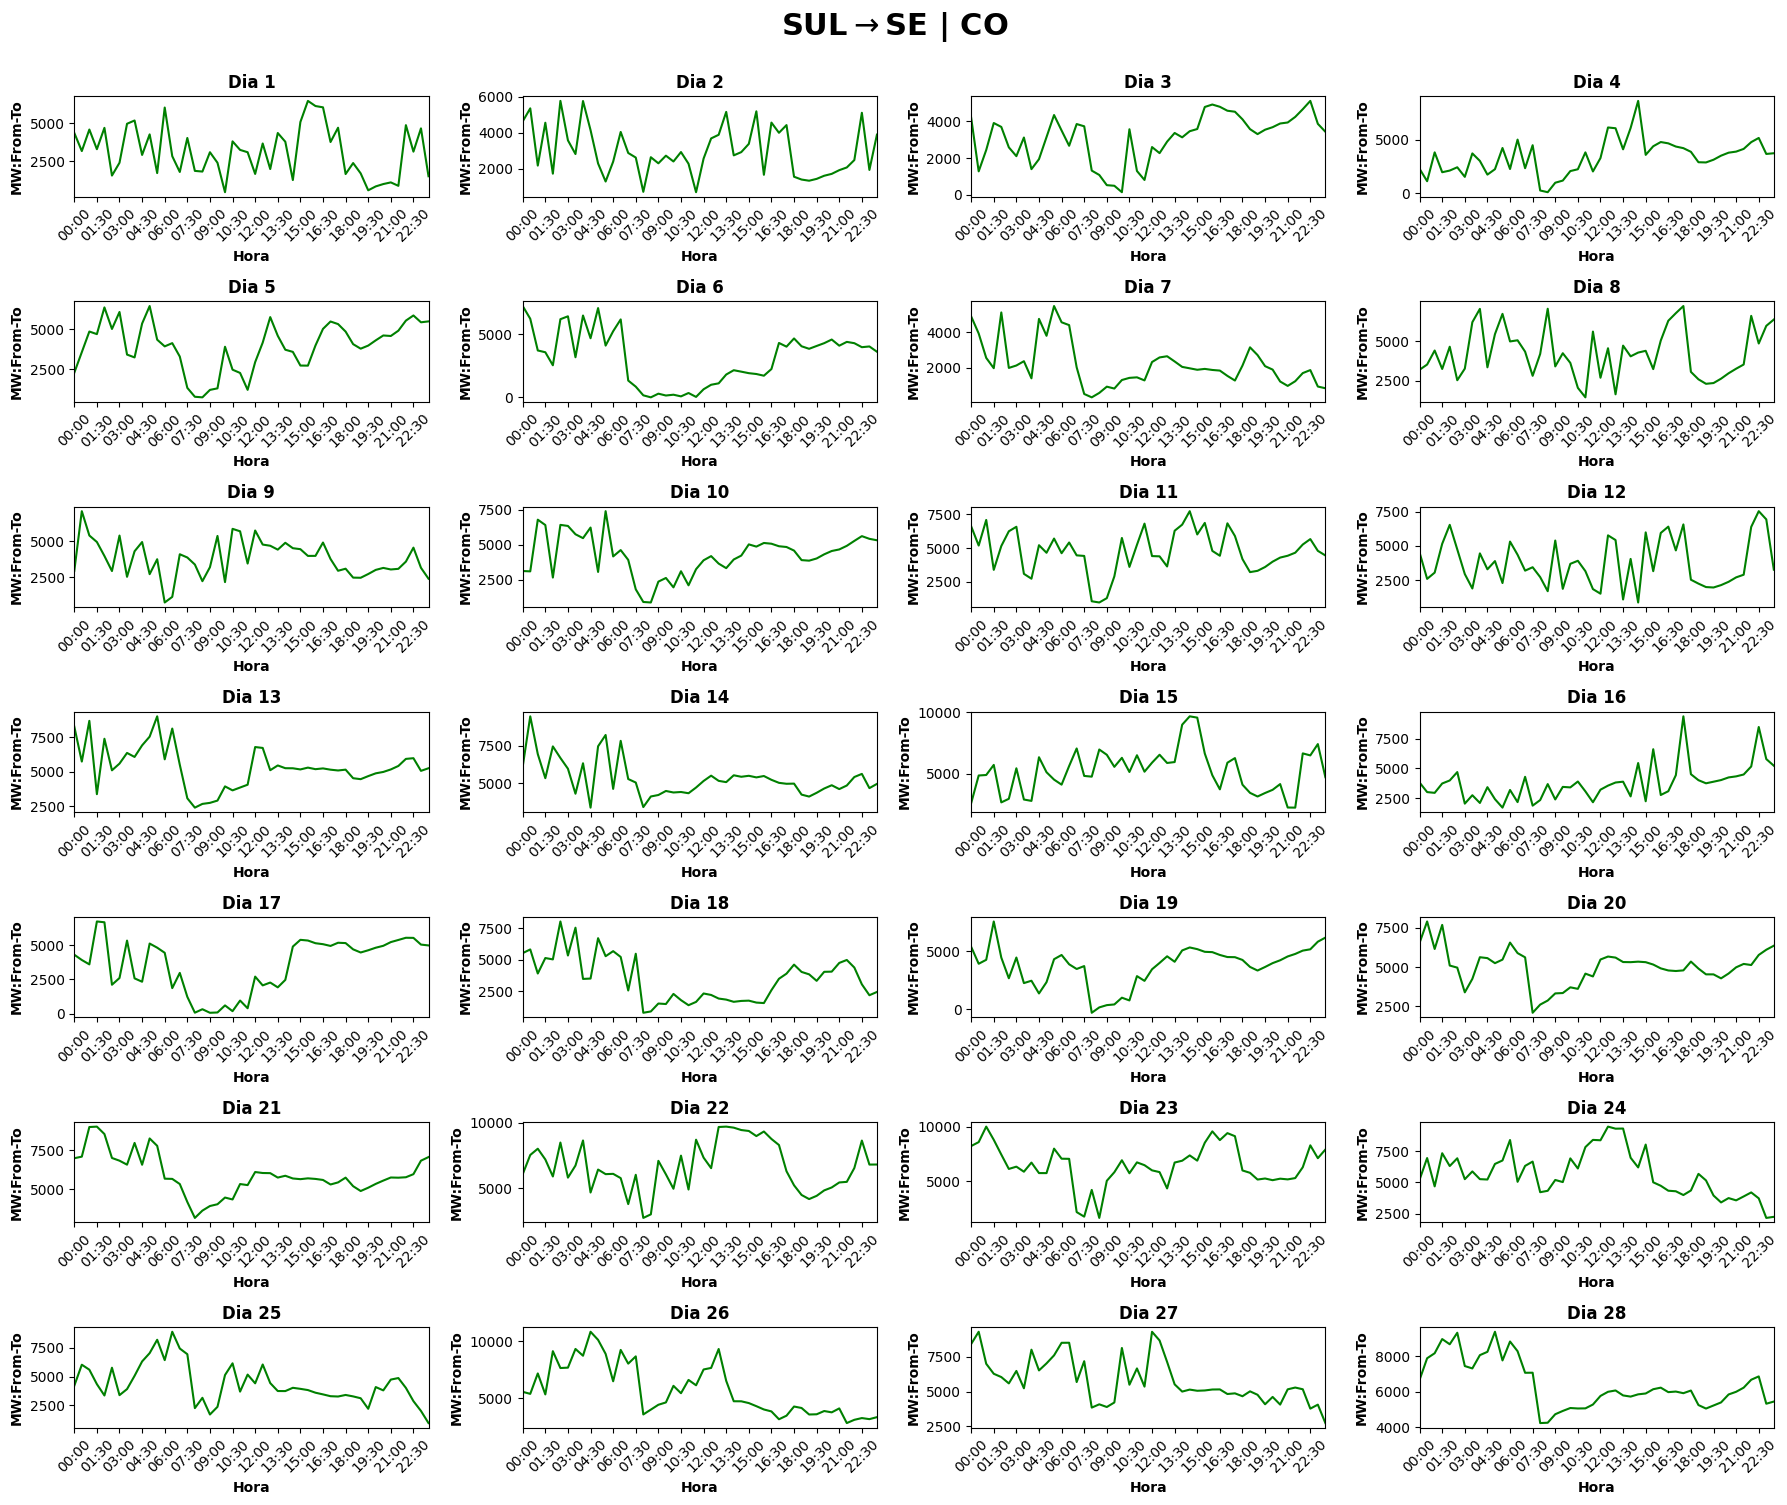

In [48]:
general_plot(EXPSULSECO, 'MW:From-To', 'SUL', 'SE | CO')

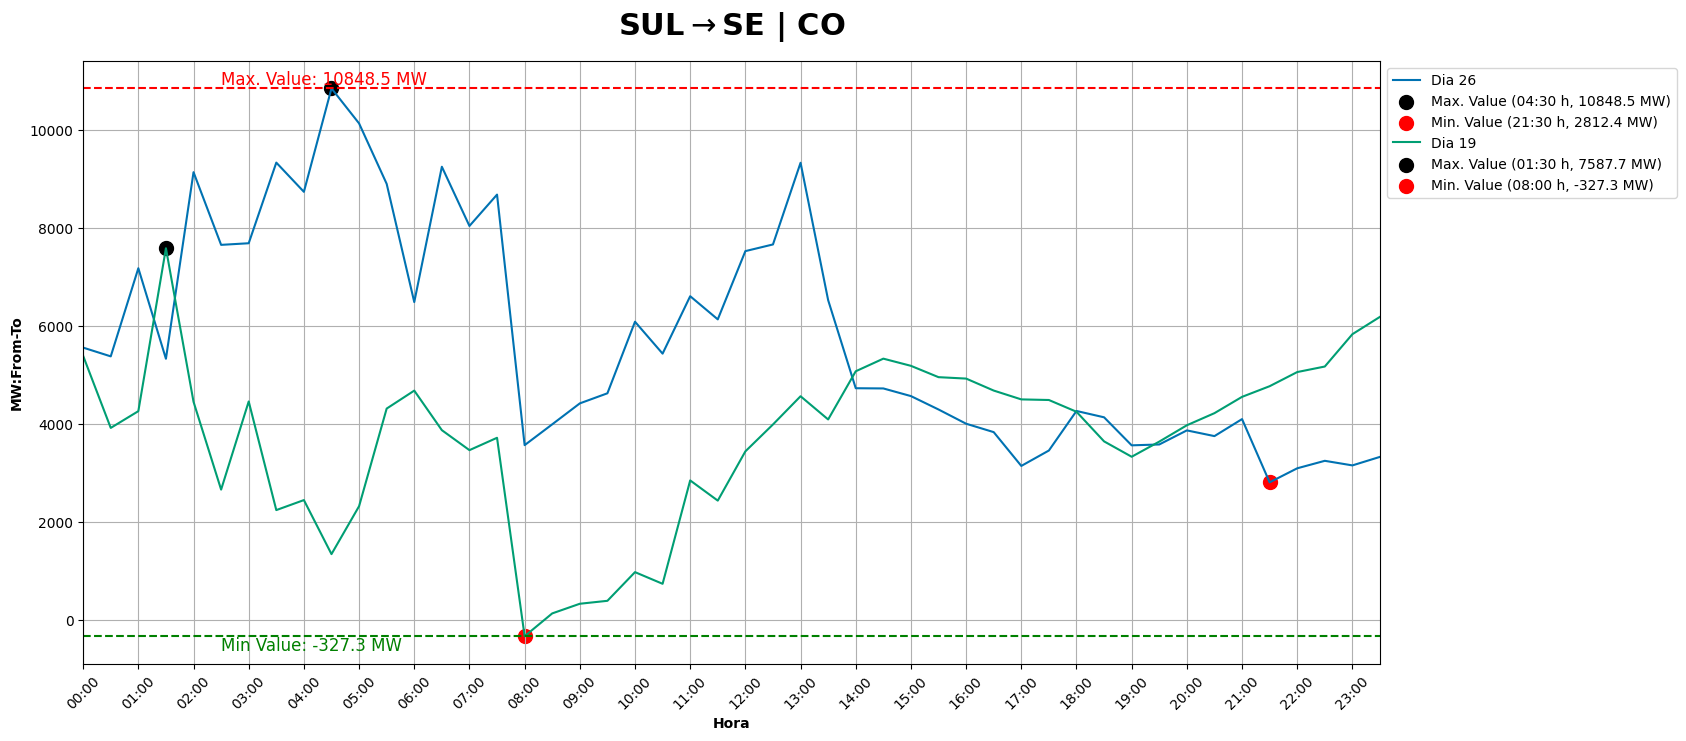

In [49]:
min_max_plot(EXPSULSECO, 'MW:From-To', 'SUL', 'SE | CO')

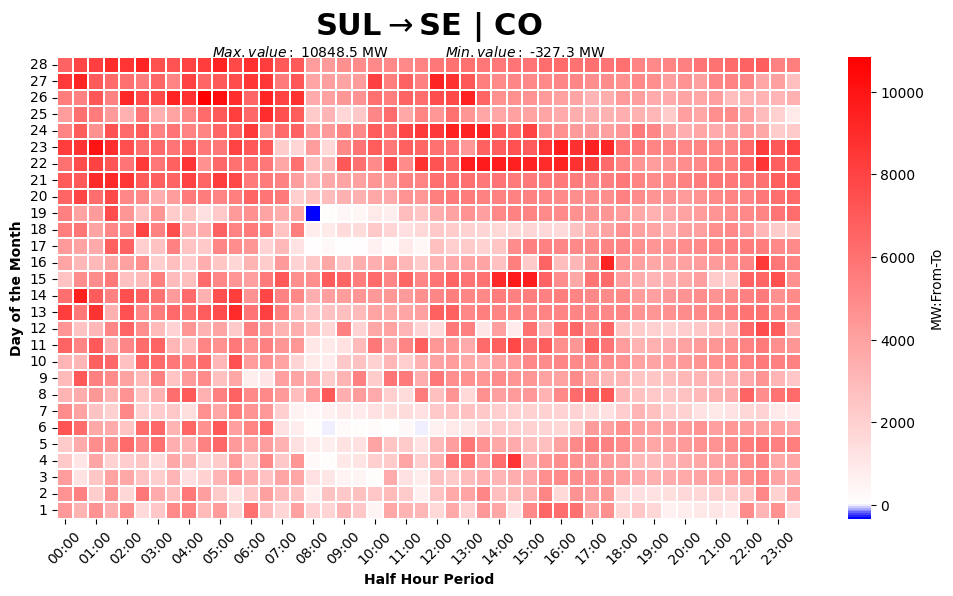

In [50]:
flow_heatmap(EXPSULSECO, 'MW:From-To', 'SUL', 'SE | CO')

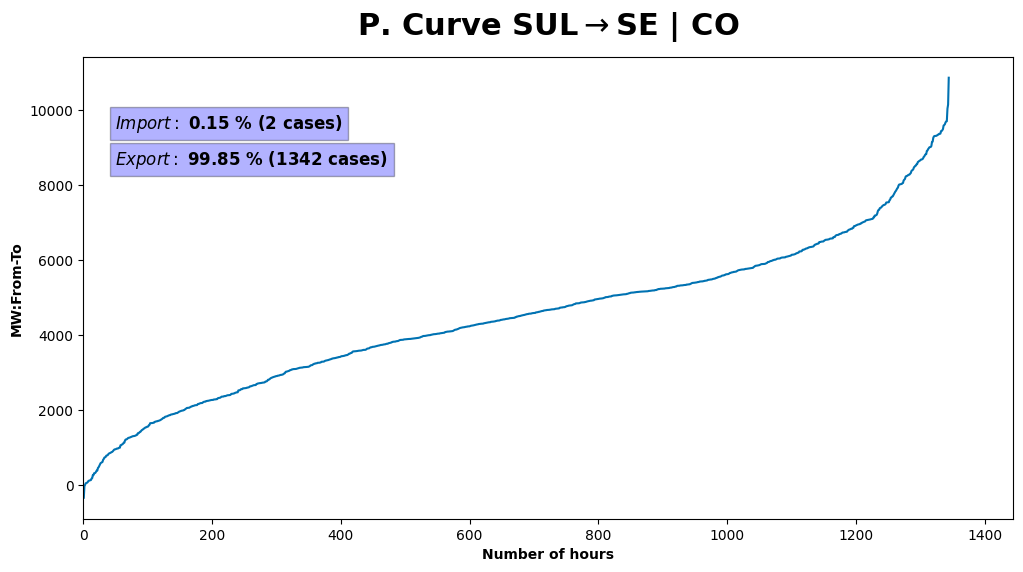

In [51]:
persistency_curve(EXPSULSECO, 'MW:From-To', 'SUL', 'SE | CO', 50, 9500, 960)

<b><h2 style="color:#FF851B;">MVAr</h2></b>

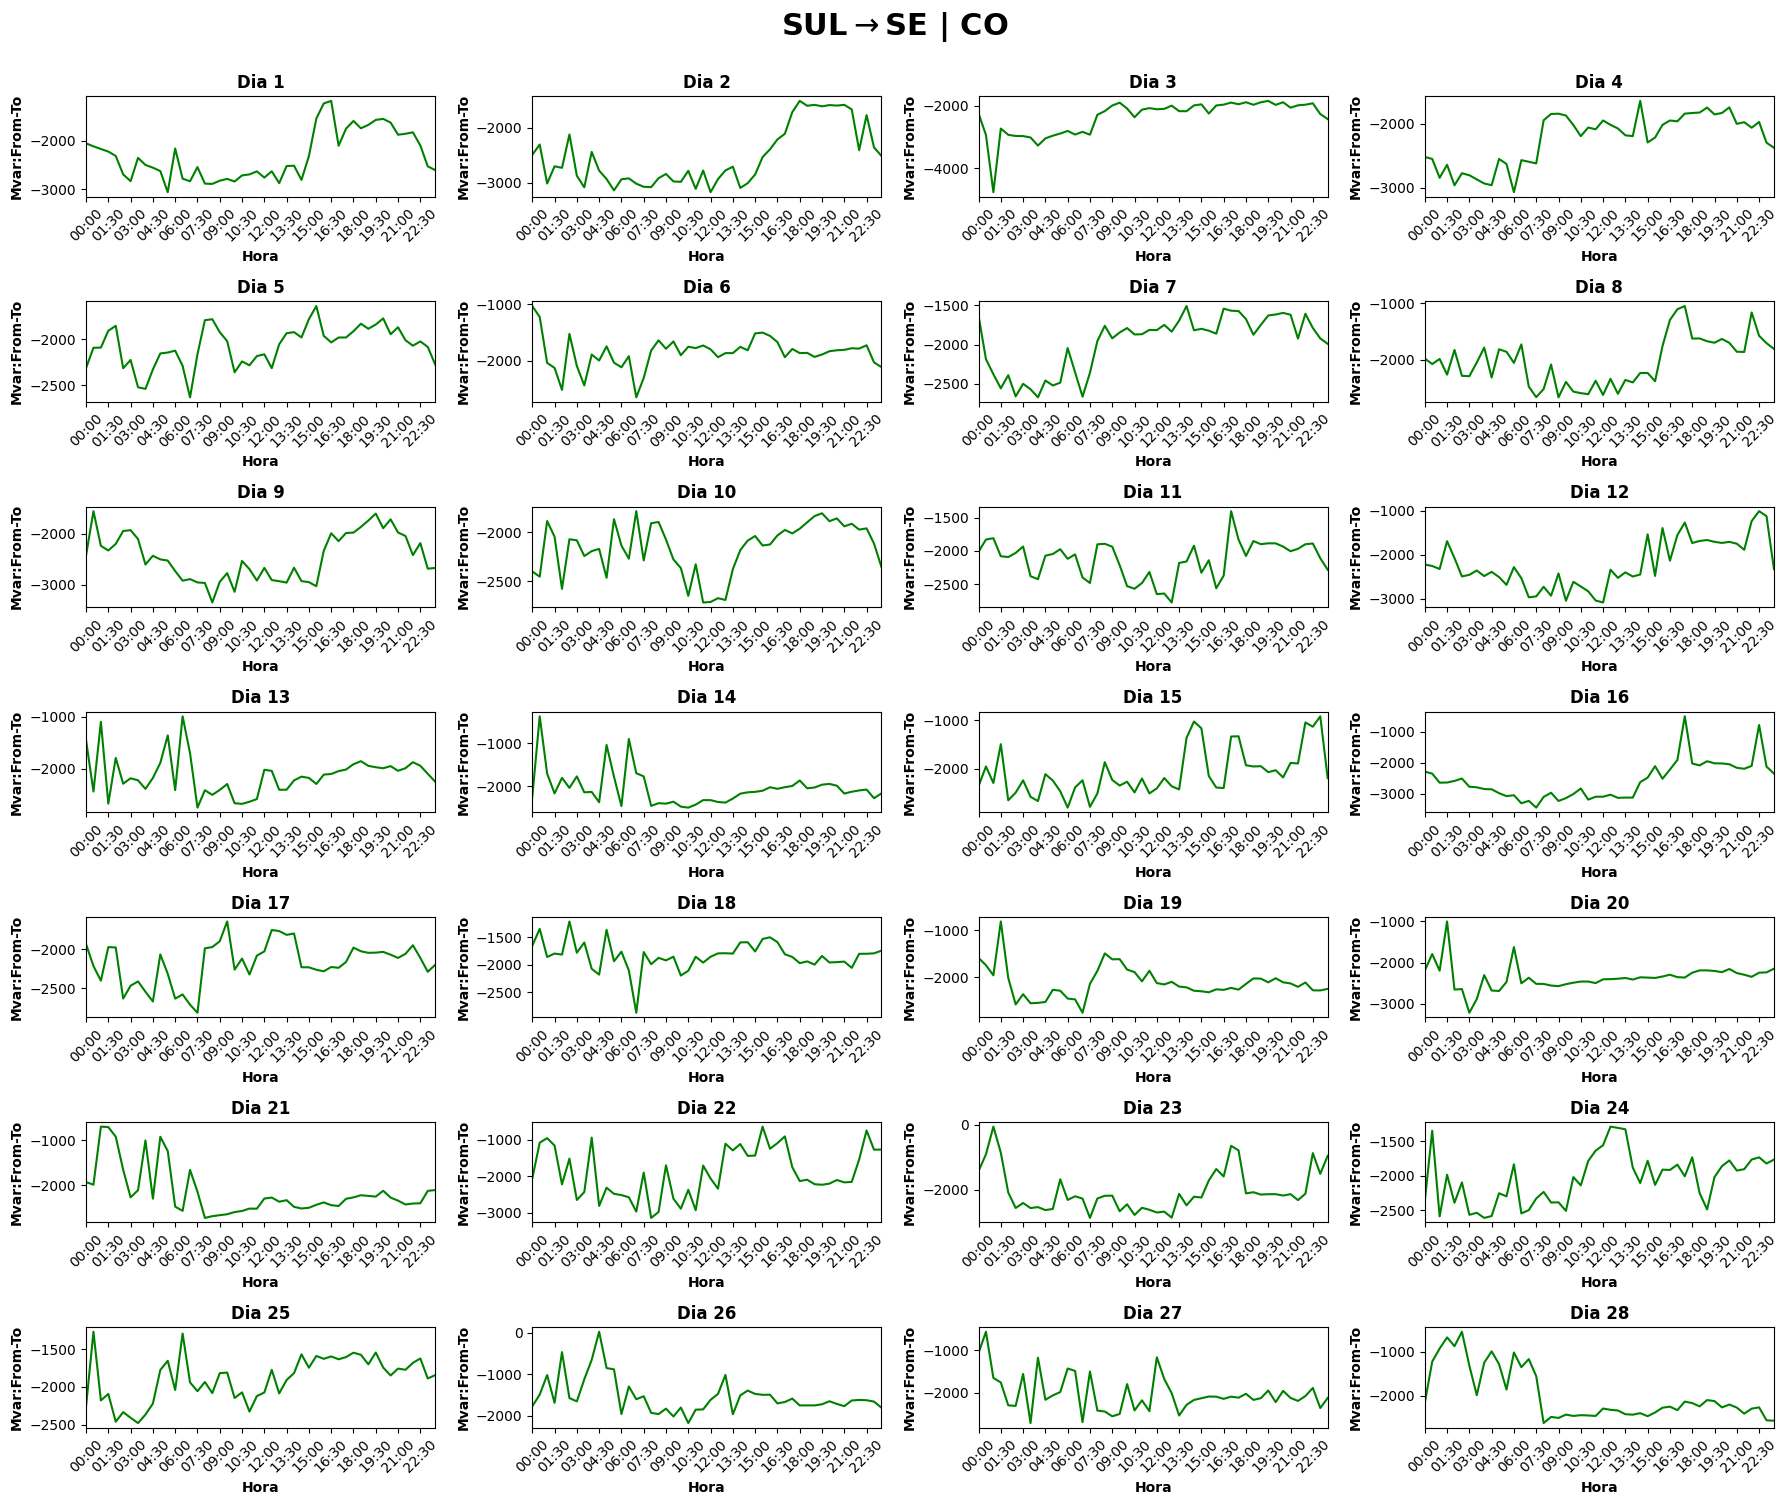

In [52]:
general_plot(EXPSULSECO, 'Mvar:From-To', 'SUL', 'SE | CO')

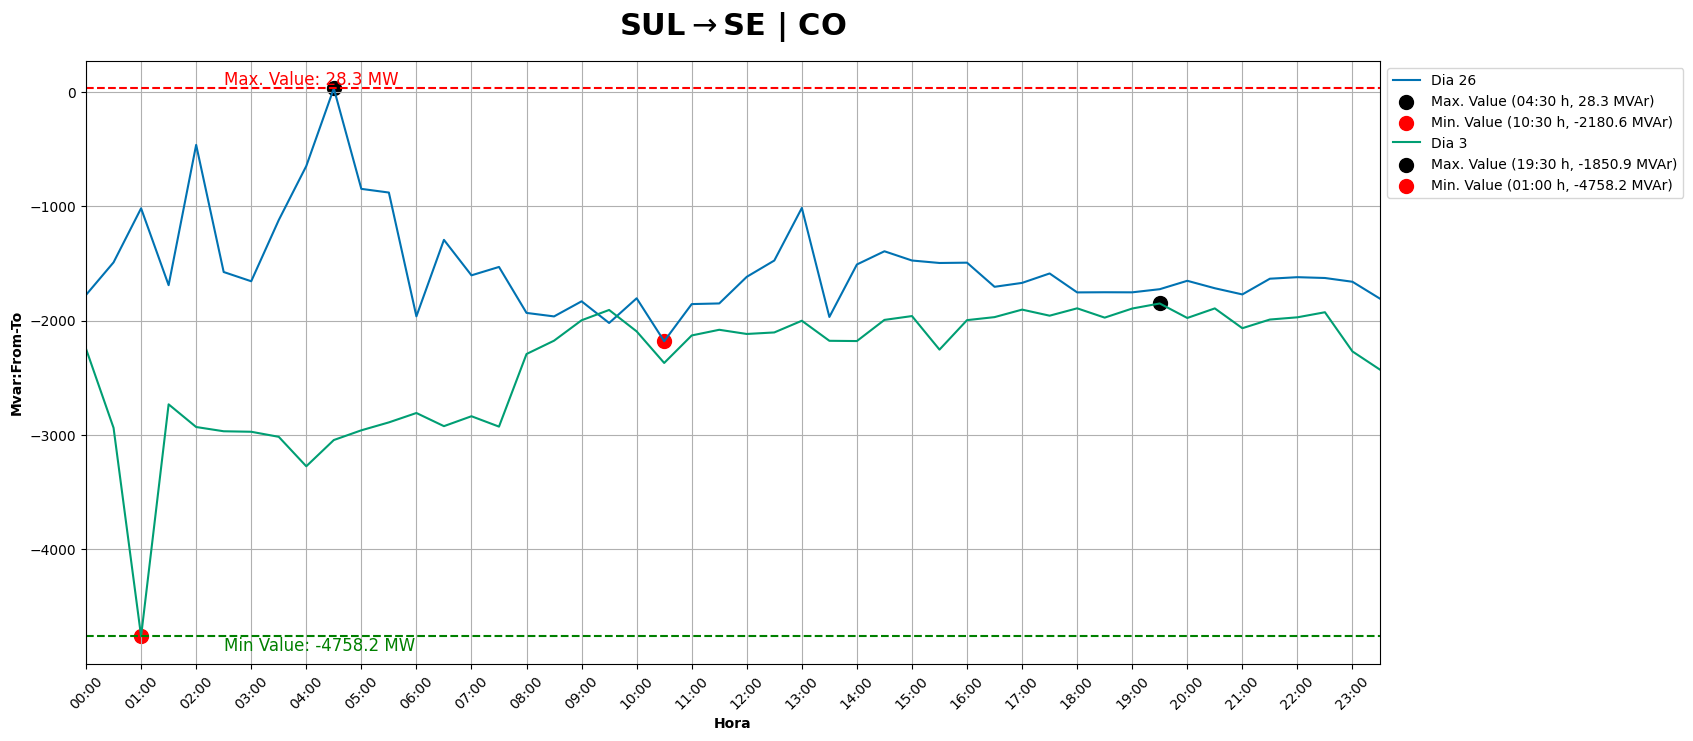

In [53]:
min_max_plot(EXPSULSECO, 'Mvar:From-To', 'SUL', 'SE | CO')

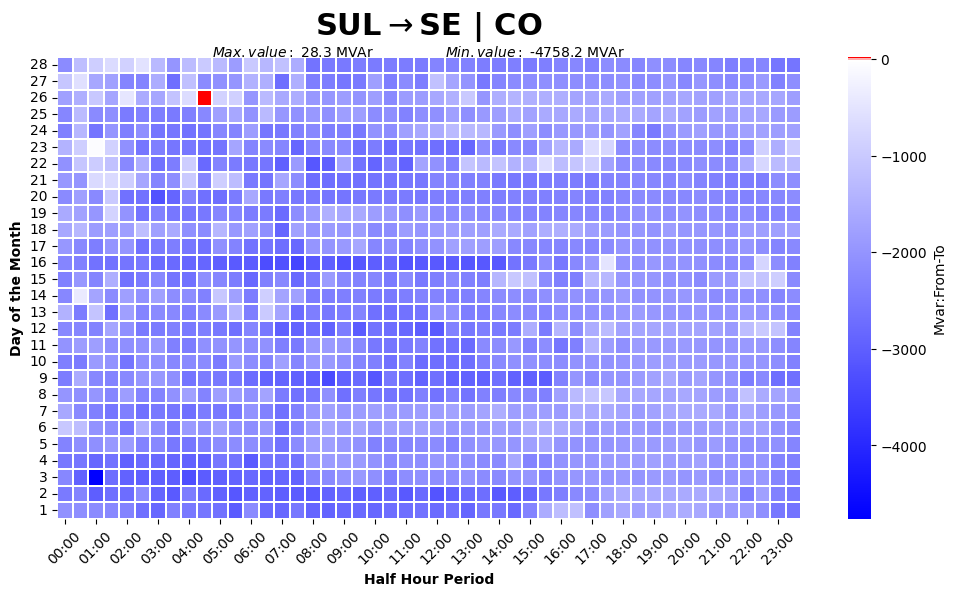

In [54]:
flow_heatmap(EXPSULSECO, 'Mvar:From-To', 'SUL', 'SE | CO')

<b><h1 style="color:#FFDC00;">Box Plot & Violin Plot</h1></b>

In [55]:
def create_boxplots(col=None, title=None):

    EXP_NEN     = np.array(EXPNEN[col])
    EXP_NESE    = np.array(EXPNESE[col])
    EXP_NE      = np.array(EXPNE[col])
    EXP_SULSECO = np.array(EXPSULSECO[col])
    EXP_NS      = np.array(EXPNS[col])

    all_data = [EXP_NEN, EXP_NESE, EXP_NE, EXP_SULSECO, EXP_NS]
    df_dict = {'EXP_NEN': EXP_NEN, 'EXP_NESE': EXP_NESE, 
           'EXP_NE': EXP_NE, 'EXP_SULSECO': EXP_SULSECO, 'EXP_NS': EXP_NS}
    df_fluxos = pd.DataFrame(df_dict)
    df_fluxos

    path = 'E:/FERV/marck/202210_Melhor Previsao FNS/Plots/'

    sns.set_theme(style="ticks")

    if col == 'MW:From-To':
        fig, axes = plt.subplots(2, 3, figsize=(15, 8))
        axes = axes.flatten()

        smooth_palette = sns.color_palette('viridis', n_colors=len(df_fluxos.columns))
        for i, (col, ax, color) in enumerate(zip(df_fluxos.columns, axes, smooth_palette)):
            sns.boxplot(y=col, data=df_fluxos, ax=ax, color=color)
            ax.set_xlabel(col, weight='bold')
            ax.set_ylabel('P (MW)', weight='bold')

        fig.delaxes(axes[-1])
        plt.suptitle('PWF16' + ' ' + title, weight='bold', fontsize=25)

        plt.tight_layout()
        plt.savefig(path + 'MW/06 BoxVio Plots/MW_BoxPlot_V1.png')
        plt.show()

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
        sns.boxplot(all_data, palette="vlag")

        ax.yaxis.grid(True)
        ax.set_xticks([y for y in range(len(all_data))],
                        labels=['EXP NE-N', 'EXP NE-SE', 'EXP NE', 'EXP SUL-SECO', 'EXP N-S'], weight='bold')
        ax.set_ylabel('P [MW]', weight='bold', fontdict={'fontsize': 25})
        ax.set_title('PWF16' + ' ' + title, weight='bold', fontdict={'fontsize': 25})
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=15)
        plt.savefig(path + 'MW/06 BoxVio Plots/MW_BoxPlot_V2.png')
        plt.show()

    else:
        fig, axes = plt.subplots(2, 3, figsize=(15, 8))
        axes = axes.flatten()

        smooth_palette = sns.color_palette('viridis', n_colors=len(df_fluxos.columns))
        for i, (col, ax, color) in enumerate(zip(df_fluxos.columns, axes, smooth_palette)):
            sns.boxplot(y=col, data=df_fluxos, ax=ax, color=color)
            ax.set_xlabel(col, weight='bold')
            ax.set_ylabel('Q (MVAr)', weight='bold')

        fig.delaxes(axes[-1])
        plt.suptitle('PWF16' + ' ' + title, weight='bold', fontsize=25)

        plt.tight_layout()
        plt.savefig(path + 'MVAr/06 BoxVio Plots/MVAr_BoxPlot_V1.png')
        plt.show()

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

        sns.boxplot(all_data, palette="vlag")

        ax.yaxis.grid(True)
        ax.set_xticks([y for y in range(len(all_data))],
                        labels=['EXP NE-N', 'EXP NE-SE', 'EXP NE', 'EXP SUL-SECO', 'EXP N-S'], weight='bold')
        ax.set_ylabel('Q [MVAr]', weight='bold', fontdict={'fontsize': 25})
        ax.set_title('PWF16' + ' ' + title, weight='bold', fontdict={'fontsize': 25})
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=15)
        plt.savefig(path + 'MVAr/06 BoxVio Plots/MVAr_BoxPlot_V2.png')
        plt.show()
        

In [74]:
def create_violinplots(col=None, title=None):

    EXP_NEN     = np.array(EXPNEN[col])
    EXP_NESE    = np.array(EXPNESE[col])
    EXP_NE      = np.array(EXPNE[col])
    EXP_SULSECO = np.array(EXPSULSECO[col])
    EXP_NS      = np.array(EXPNS[col])

    all_data = [EXP_NEN, EXP_NESE, EXP_NE, EXP_SULSECO, EXP_NS]
    df_dict = {'EXP_NEN': EXP_NEN, 'EXP_NESE': EXP_NESE, 
           'EXP_NE': EXP_NE, 'EXP_SULSECO': EXP_SULSECO, 'EXP_NS': EXP_NS}
    df_fluxos = pd.DataFrame(df_dict)
    df_fluxos

    path = 'E:/FERV/marck/202210_Melhor Previsao FNS/Plots/'

    sns.set_theme(style="ticks")

    if col == 'MW:From-To':
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

        sns.violinplot(all_data,
                        showmeans=False,
                        showmedians=True, orient='h', inner="quart")

        # adding horizontal grid lines
        ax.xaxis.grid(True)
        ax.set_yticks([y for y in range(len(all_data))],
                        labels=['EXP NE-N', 'EXP NE-SE', 'EXP NE', 'EXP SUL-SECO', 'EXP N-S'], weight='bold')
        ax.set_xlabel('P [MW]', weight='bold', fontdict={'fontsize': 25})
        ax.set_title('PWF16' + ' ' + title, weight='bold', fontdict={'fontsize': 25})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=20)
        plt.savefig(path + 'MW/06 BoxVio Plots/MW_VioPlot_V1.png')
        plt.show()

        fig, axes = plt.subplots(2, 3, figsize=(15, 8))
        axes = axes.flatten()

        colors = sns.color_palette("viridis", n_colors=len(df_fluxos.columns))
        for i, (col, ax, color) in enumerate(zip(df_fluxos.columns, axes, colors)):
            #print(col)
            sns.violinplot(y=col, data=df_fluxos, ax=ax, palette=[color], showmeans=False, showmedians=True, inner="quart")
            ax.set_ylabel('P [MW]', weight='bold')
            ax.set_xlabel(col, weight='bold') 
            ax.grid(True)  # Show grid lines

        fig.delaxes(axes[-1])
        plt.suptitle('PWF16' + ' ' + title, weight='bold', fontsize=25)

        plt.tight_layout()
        plt.savefig(path + 'MW/06 BoxVio Plots/MW_VioPlot_V2.png')
        plt.show()
        
    else:
        
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

        sns.violinplot(all_data,
                        showmeans=False,
                        showmedians=True, orient='h', inner="quart")

        # adding horizontal grid lines
        ax.xaxis.grid(True)
        ax.set_yticks([y for y in range(len(all_data))],
                        labels=['EXP NE-N', 'EXP NE-SE', 'EXP NE', 'EXP SUL-SECO', 'EXP N-S'], weight='bold')
        ax.set_xlabel('Q [MVAr]', weight='bold', fontdict={'fontsize': 25})
        ax.set_title('PWF16' + ' ' + title, weight='bold', fontdict={'fontsize': 25})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=20)
        plt.savefig(path + 'MVAr/06 BoxVio Plots/MVAr_VioPlot_V1.png')
        plt.show()

        fig, axes = plt.subplots(2, 3, figsize=(15, 8))
        axes = axes.flatten()

        colors = sns.color_palette("viridis", n_colors=len(df_fluxos.columns))
        for i, (col, ax, color) in enumerate(zip(df_fluxos.columns, axes, colors)):
            #print(col)
            sns.violinplot(y=col, data=df_fluxos, ax=ax, palette=[color], showmeans=False, showmedians=True, inner="quart")
            ax.set_ylabel('Q [MVAr]', weight='bold')
            ax.set_xlabel(col, weight='bold') 
            ax.grid(True)  # Show grid lines

        fig.delaxes(axes[-1])
        plt.suptitle('PWF16' + ' ' + title, weight='bold', fontsize=25)

        plt.tight_layout()
        plt.savefig(path + 'MVAr/06 BoxVio Plots/MVAr_VioPlot_V2.png')
        plt.show()

<b><h2 style="color:#FF851B;">MW</h2></b>

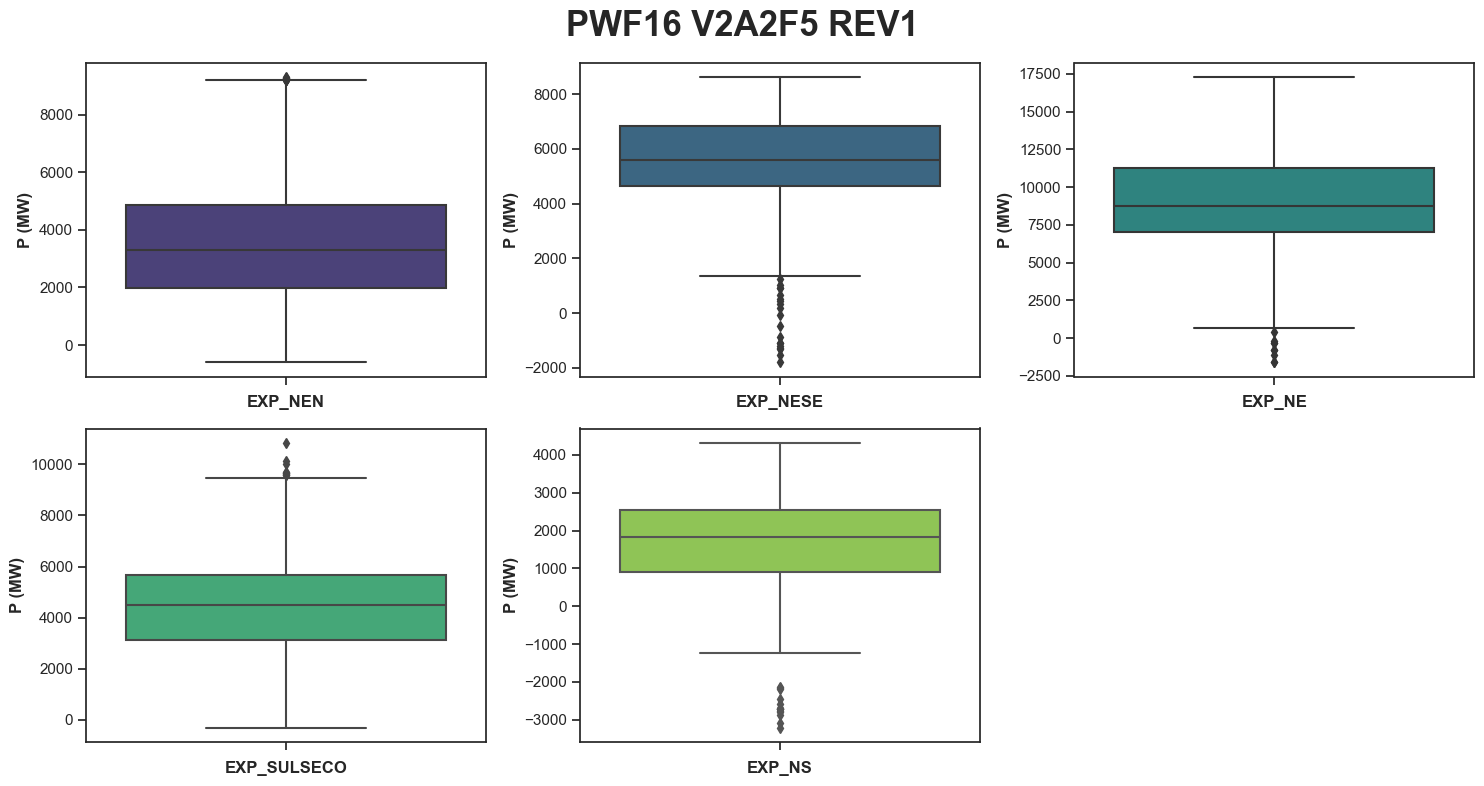

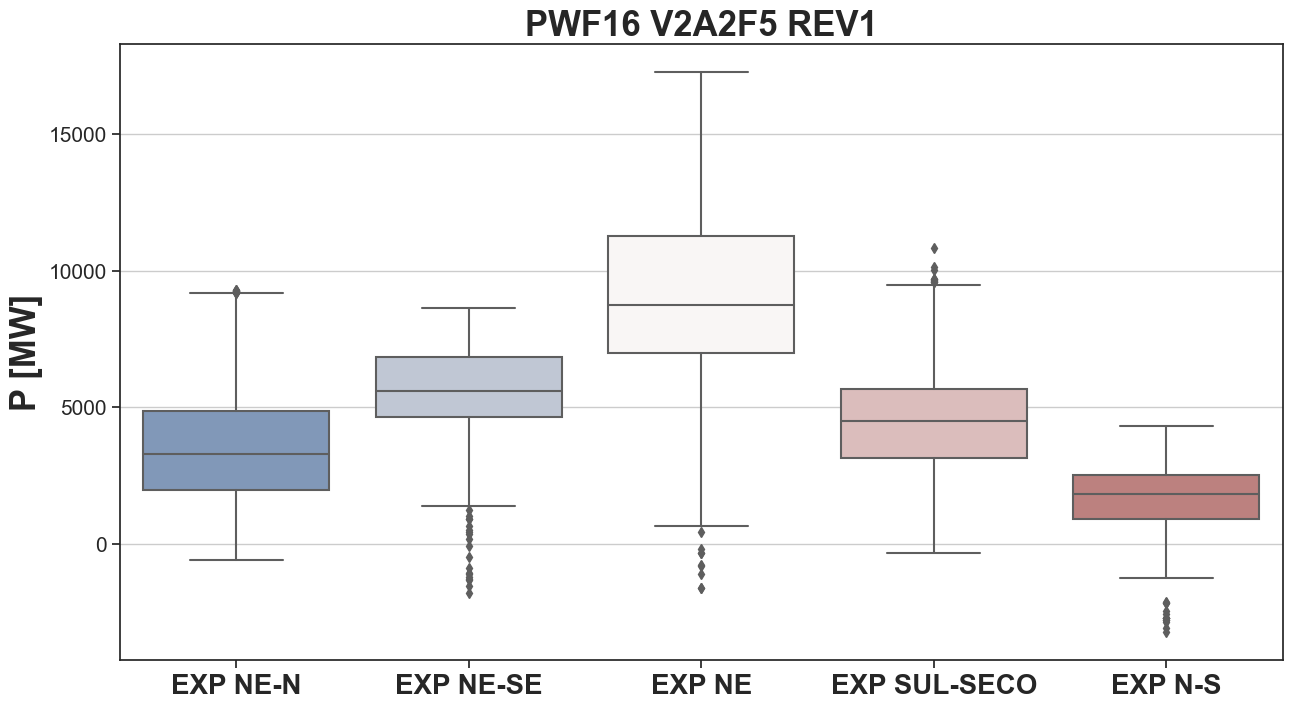

In [75]:
create_boxplots(col='MW:From-To', title='V2A2F5 REV1')

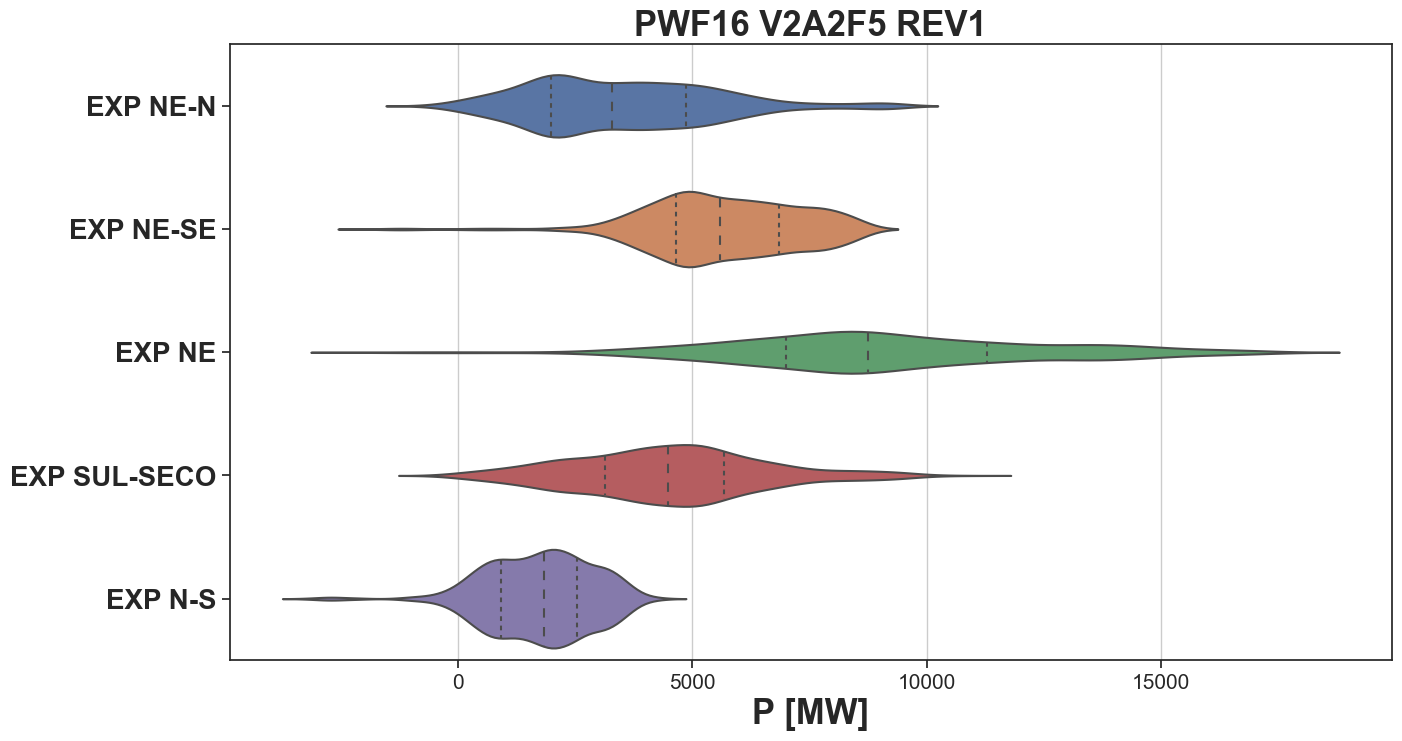

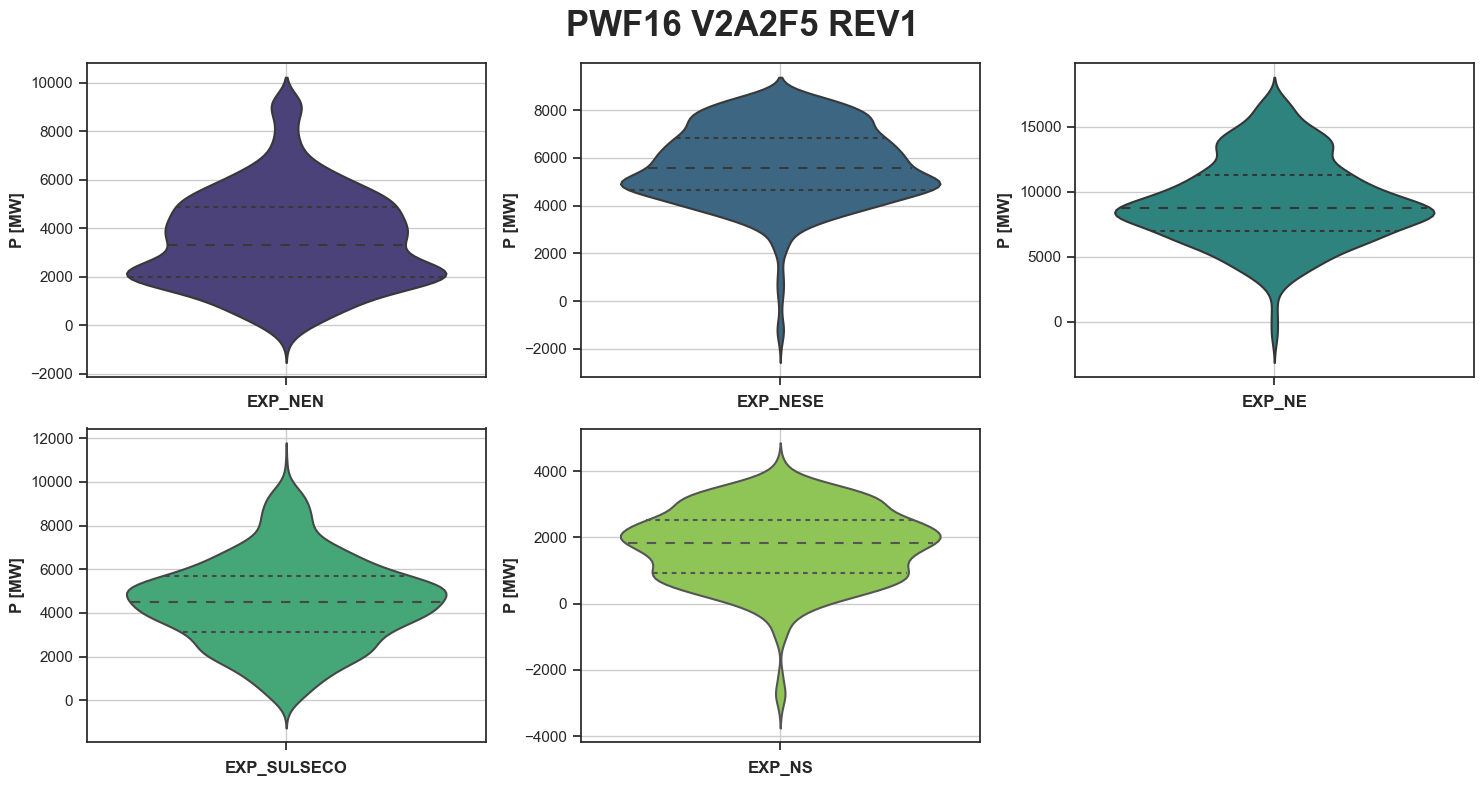

In [76]:
create_violinplots(col='MW:From-To', title='V2A2F5 REV1')

<b><h2 style="color:#FF851B;">MVAr</h2></b>

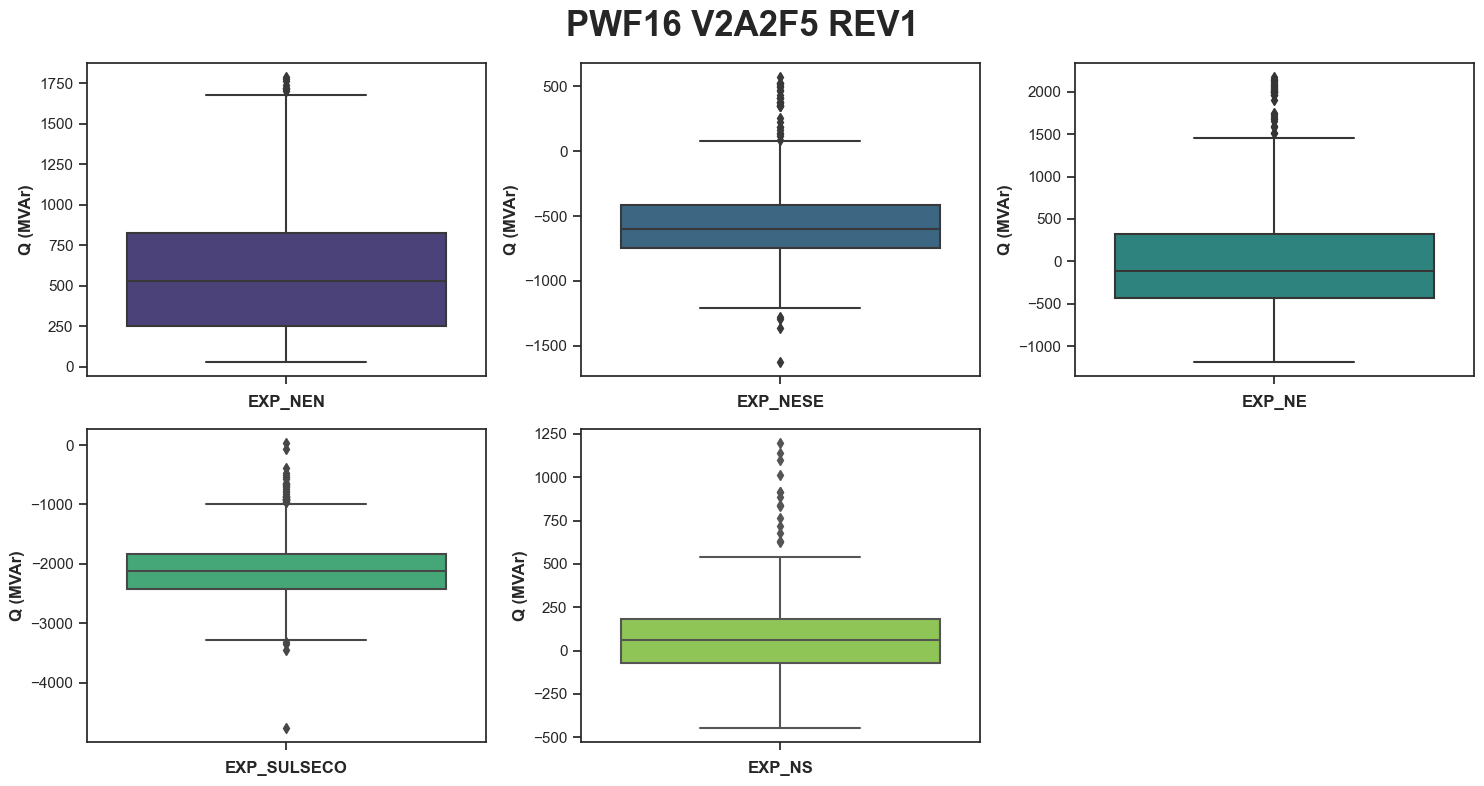

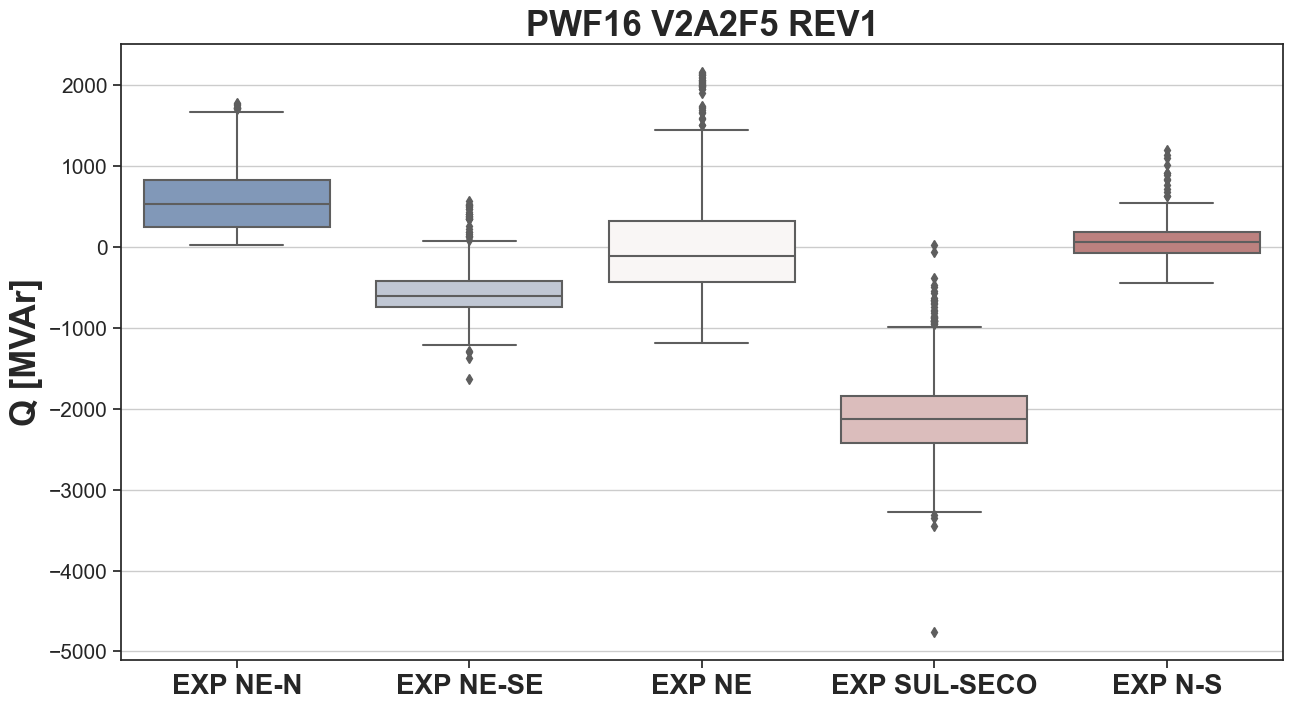

In [59]:
create_boxplots(col='Mvar:From-To', title='V2A2F5 REV1')

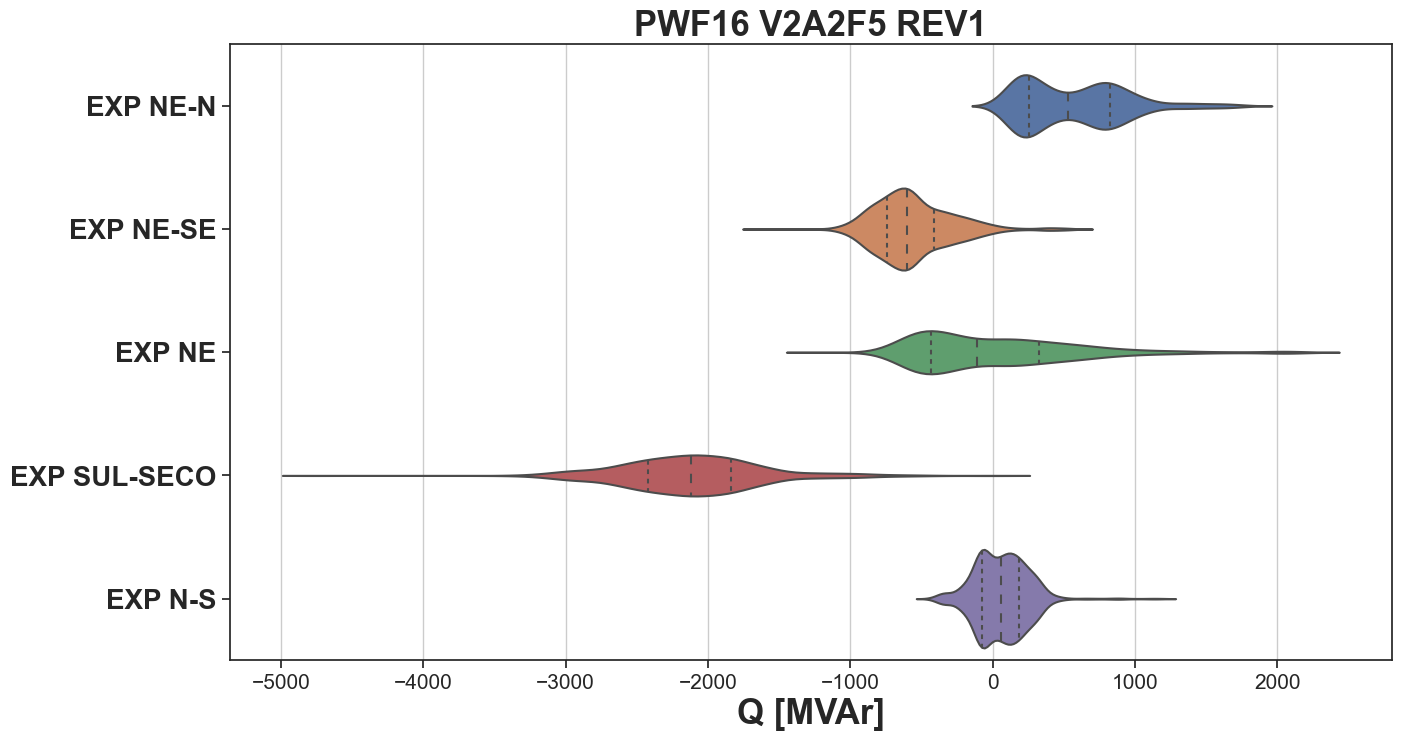

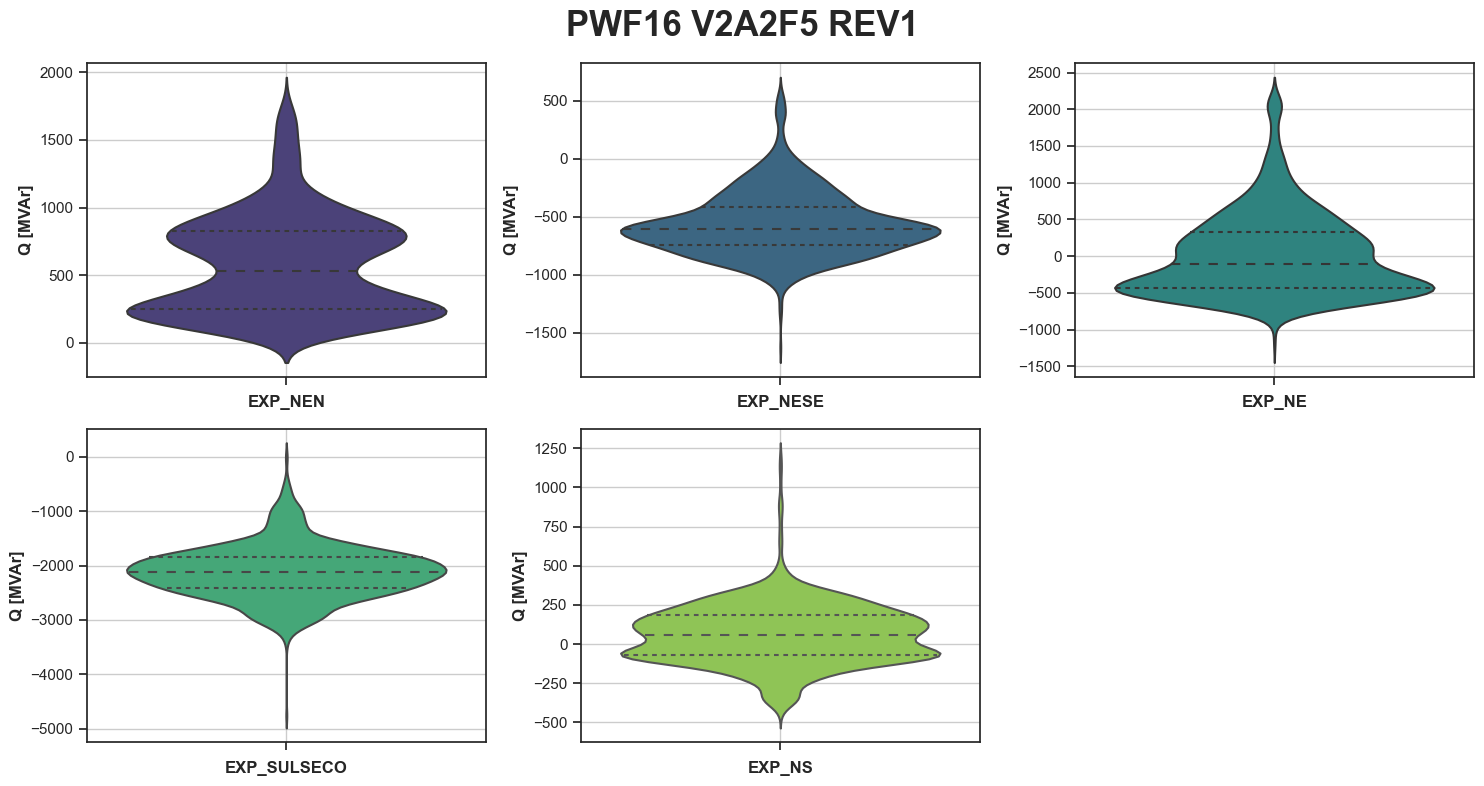

In [70]:
create_violinplots(col='Mvar:From-To', title='V2A2F5 REV1')

# Export Data

In [22]:
EXP_NEN     = EXPNEN.iloc[:, 0:3]
EXP_NEN['Nome Elo'] = 'EXP_NEN'
EXP_NESE    = EXPNESE.iloc[:, 0:3]
EXP_NESE['Nome Elo'] = 'EXP_NESE'
EXP_NE      = EXPNE.iloc[:, 0:3]
EXP_NE['Nome Elo'] = 'EXP_NE'
EXP_SULSECO = EXPSULSECO.iloc[:, 0:3]
EXP_SULSECO['Nome Elo'] = 'EXP_SULSECO'
EXP_NS      = EXPNS.iloc[:, 0:3]
EXP_NS['Nome Elo'] = 'EXP_NS'

df_INTER = pd.concat([EXP_NEN, EXP_NESE, EXP_NE, EXP_SULSECO, EXP_NS], axis=0)

df_INTER['Nome Elo'].value_counts()

Nome Elo
EXP_NEN        1344
EXP_NESE       1344
EXP_NE         1344
EXP_SULSECO    1344
EXP_NS         1344
Name: count, dtype: int64

In [31]:
df_INTER

Dia   Hora  MW:From-To Nome Elo
0       2  00:00      1538.6  EXP_NEN
1       2  00:30      1717.2  EXP_NEN
2       2  01:00      1980.2  EXP_NEN
3       2  01:30      2326.5  EXP_NEN
4       2  02:00      2270.7  EXP_NEN
...   ...    ...         ...      ...
1339   29  21:30        35.1   EXP_NS
1340   29  22:00        84.2   EXP_NS
1341   29  22:30       281.0   EXP_NS
1342   29  23:00       493.8   EXP_NS
1343   29  23:30       640.8   EXP_NS

[6720 rows x 4 columns]

In [23]:
df_INTER.to_csv('data/PTOPER_202210_PWF16_AllDecomp.csv', index=False)

In [24]:
Dia = np.array(EXPNEN['Dia'])
Hora = np.array(EXPNEN['Hora'])
EXP_NEN     = np.array(EXPNEN['MW:From-To'])
EXP_NESE    = np.array(EXPNESE['MW:From-To'])
EXP_NE      = np.array(EXPNE['MW:From-To'])
EXP_SULSECO = np.array(EXPSULSECO['MW:From-To'])
EXP_NS      = np.array(EXPNS['MW:From-To'])

all_data = [EXP_NEN, EXP_NESE, EXP_NE, EXP_SULSECO, EXP_NS]

df_dict = {'Dia': Dia, 'Hora': Hora, 'EXP_NEN': EXP_NEN, 'EXP_NESE': EXP_NESE, 
           'EXP_NE': EXP_NE, 'EXP_SULSECO': EXP_SULSECO, 'EXP_NS': EXP_NS}
df_pwf16 = pd.DataFrame(df_dict)
df_pwf16

Dia   Hora  EXP_NEN  EXP_NESE  EXP_NE  EXP_SULSECO  EXP_NS
0       2  00:00   1532.4    5173.8  6706.2       1227.1  2214.6
1       2  00:30   1672.2    4907.4  6579.6       1354.7  1997.7
2       2  01:00   1999.5    4435.3  6434.8       1563.9  1307.4
3       2  01:30   2312.9    3982.0  6294.9       1816.2   720.8
4       2  02:00   2260.5    3937.7  6198.2       1914.6   795.5
...   ...    ...      ...       ...     ...          ...     ...
1339   29  21:30   4611.2    4874.3  9485.5        510.6   -13.1
1340   29  22:00   4652.9    4826.1  9479.0        512.0    47.9
1341   29  22:30   4404.1    4779.0  9183.1        740.7   216.3
1342   29  23:00   4243.1    4759.8  9002.9        545.3   428.9
1343   29  23:30   4016.1    4702.3  8718.4        548.6   568.8

[1344 rows x 7 columns]

In [25]:
df_pwf16.to_csv('data/PTOPER_202210_PWF16_REV0.csv', index=False)